## 1. Import Basic Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset into a dataframe
pd.set_option('display.max_columns',None)
df = pd.read_csv('forest_cover.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


## 2. Data Cleaning and EDA

### 2.1 Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Our Dataset contains only numerical features!

In [4]:
#First we can create a new feature called 'Distance_To_Hydrology by using pythagoras theorem on 'Horizontal_Distance_To_Hydrology' and Vertical_Distance_To_Hydrology'.
df['Distance_To_Hydrology'] = (df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)**0.5

In [5]:
#Now let's remove the 2 features
df.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)

In [6]:
#Placing the column back to original position.
last_column = df.pop('Distance_To_Hydrology')
df.insert(3,'Distance_To_Hydrology',last_column)
df.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258.000000,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212.084889,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,275.769832,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,269.235956,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153.003268,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
#For improved readability, let's change the numbers 1,2,3,4,5 in Cover_Type to their actual values.
forest_cover = {1:'Spruce/Fir',2:'Lodgepole Pine',3:'Panderosa Pine',4:'Cottonwood/Willow',5:'Aspen',6:'Douglas-fir',7:'Krummholz'}
df['Cover_Type'] = df['Cover_Type'].map(forest_cover)

In [8]:
#Now our dataset has been cleaned and ready for processing
df.shape

(581012, 54)

In [9]:
#Check for missing values
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Distance_To_Hydrology                 0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0


No missing values!

In [10]:
df.describe(include='all')

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lodgepole Pine
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283301
mean,2959.365301,155.656807,14.103704,276.065482,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,NaN
std,279.984734,111.913721,7.488242,217.047653,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,NaN
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2809.000000,58.000000,9.000000,108.461975,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

There seems to be some skewness in the data. We'll get back to this later!

### 2.2 Target Feature

Lodgepole Pine       283301
Spruce/Fir           211840
Panderosa Pine        35754
Krummholz             20510
Douglas-fir           17367
Aspen                  9493
Cottonwood/Willow      2747
Name: Cover_Type, dtype: int64


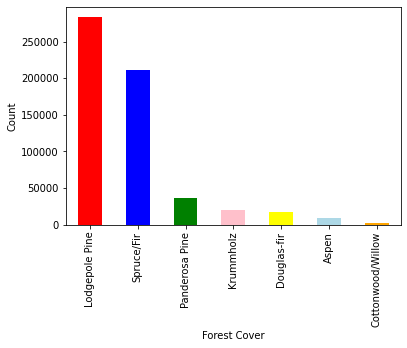

In [11]:
#Let's look at our target feature 'Cover_Type'
print(df['Cover_Type'].value_counts())
df['Cover_Type'].value_counts().plot.bar(color=['red','blue','green','pink','yellow','lightblue','orange'])
plt.xlabel('Forest Cover')
plt.ylabel('Count')
plt.show()

LodgePole Pine Trees are the most common while Cottonwood are the least common!

In [12]:
continuous_features = ['Elevation','Aspect','Slope','Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

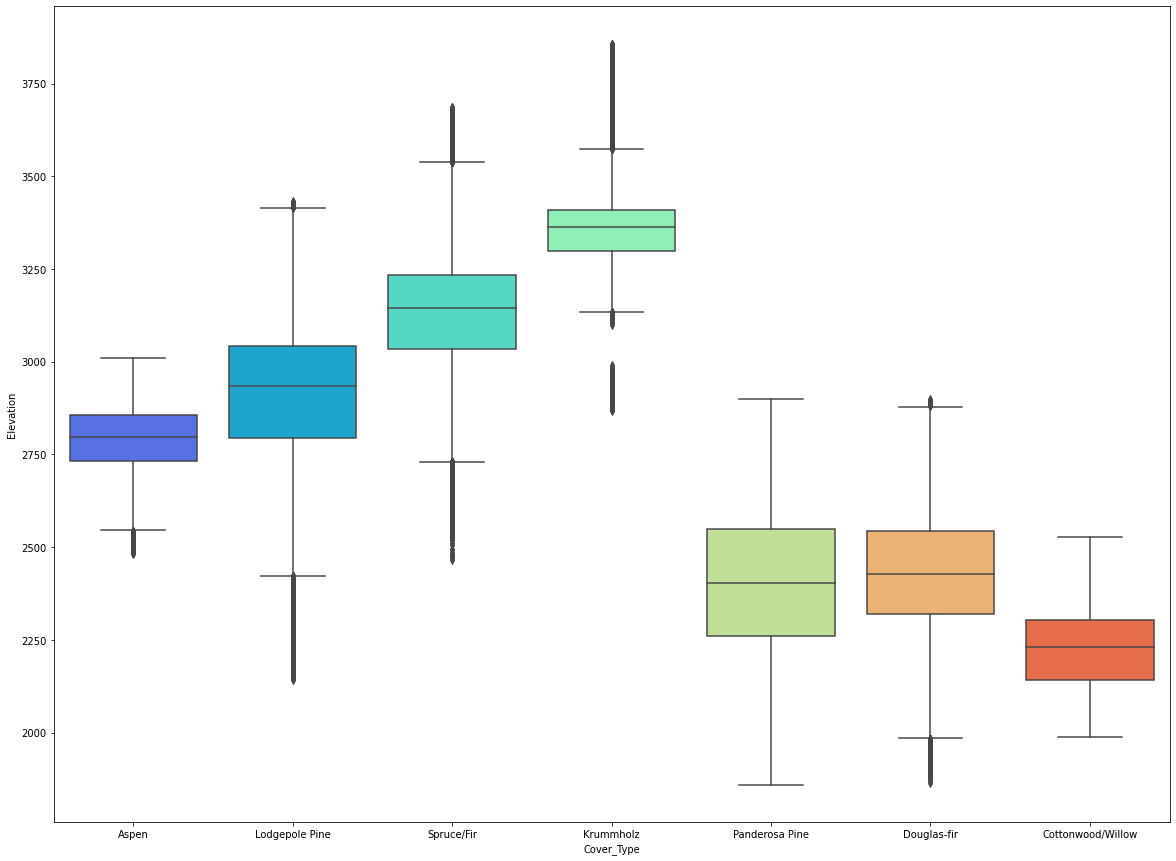

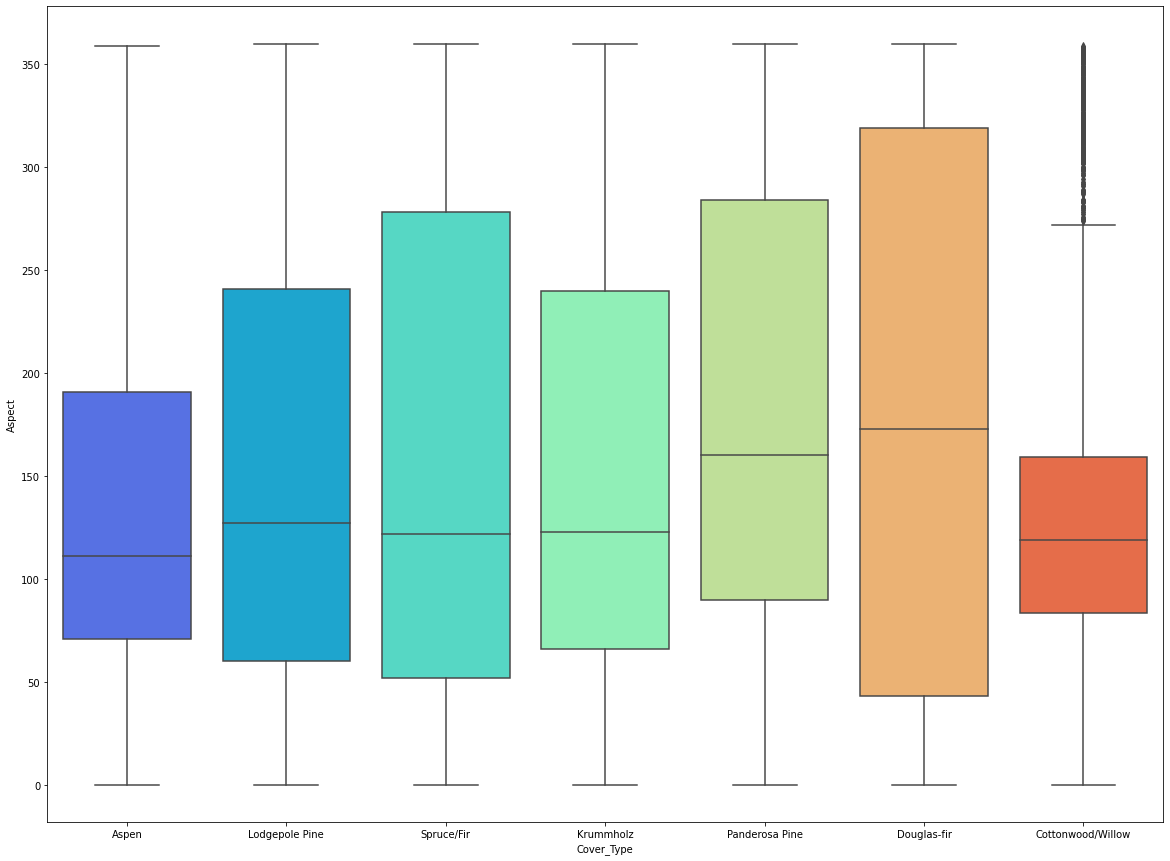

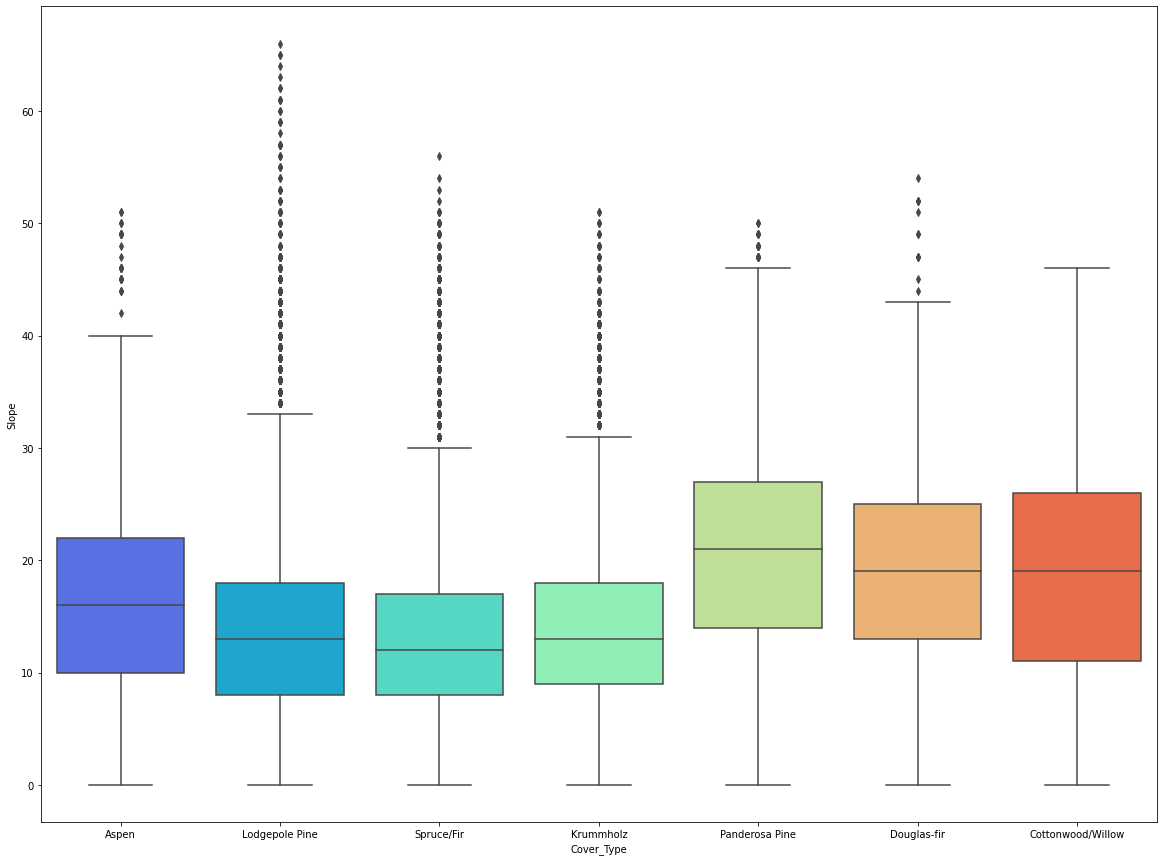

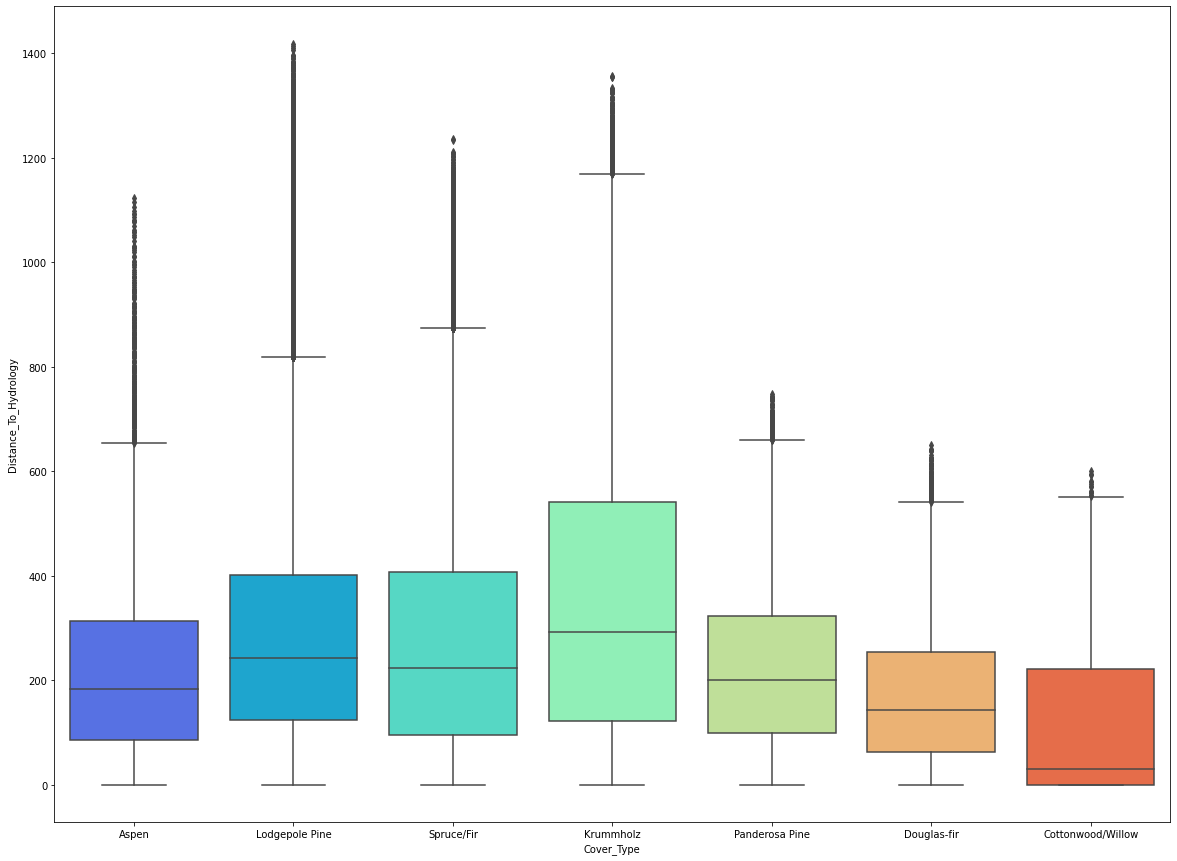

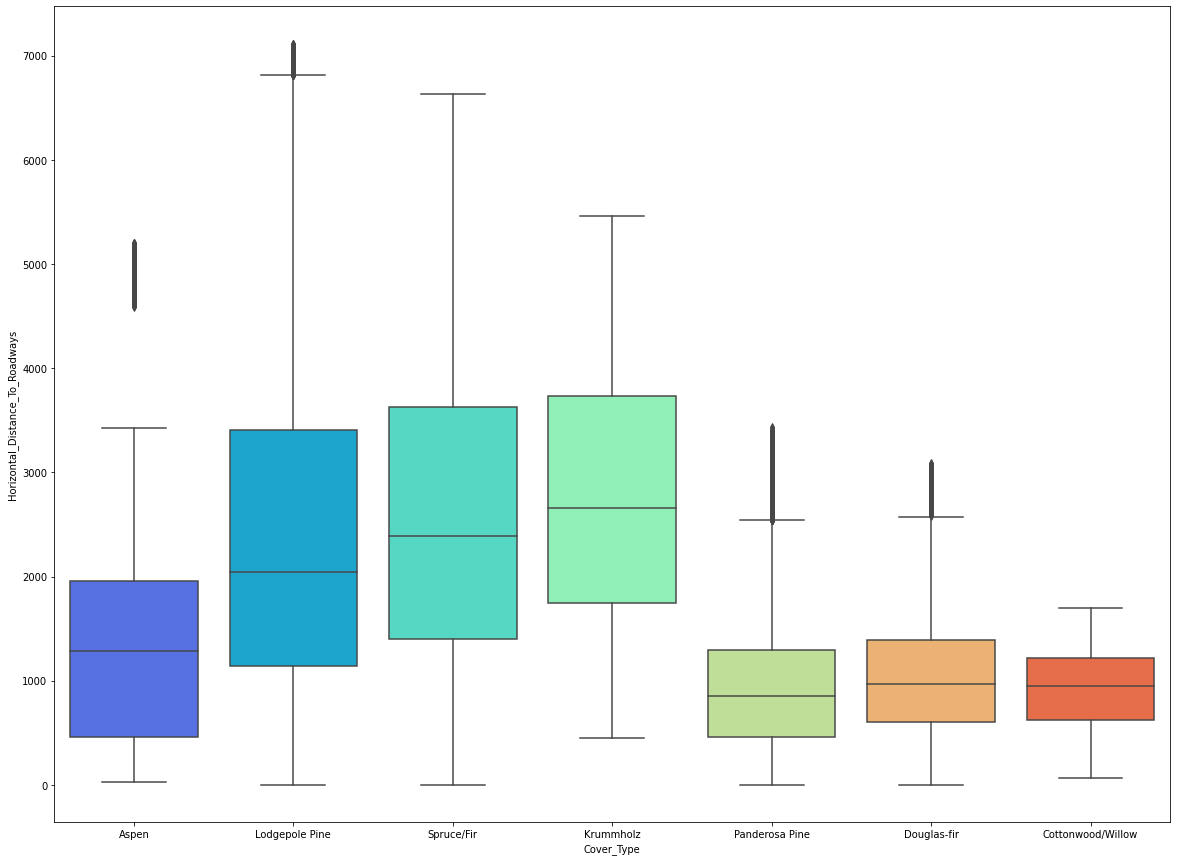

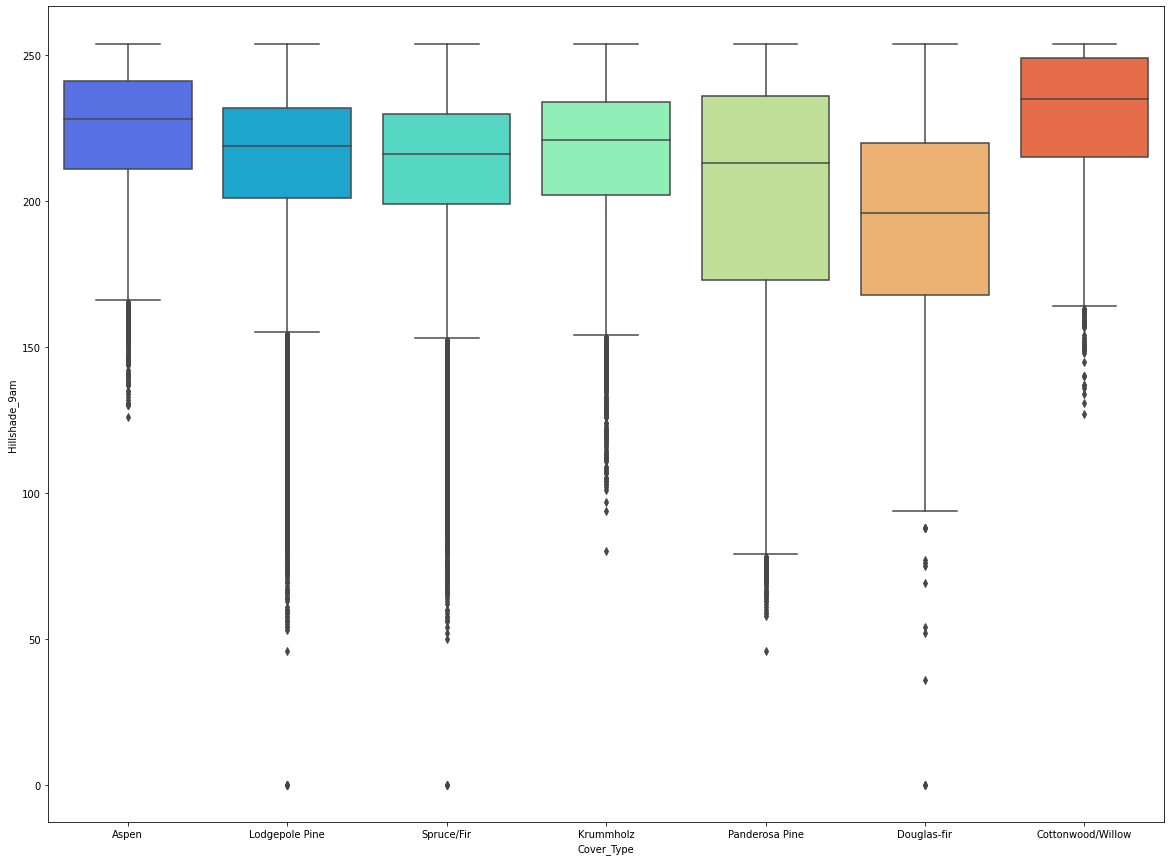

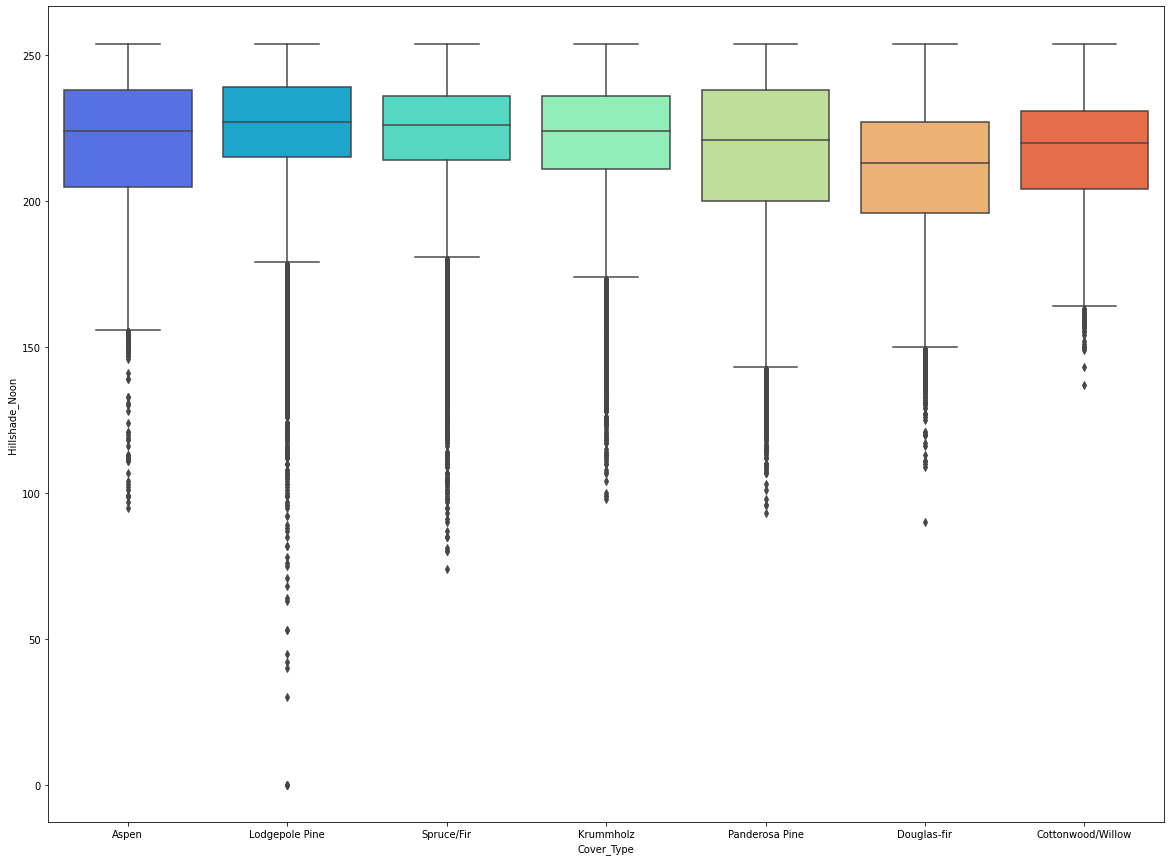

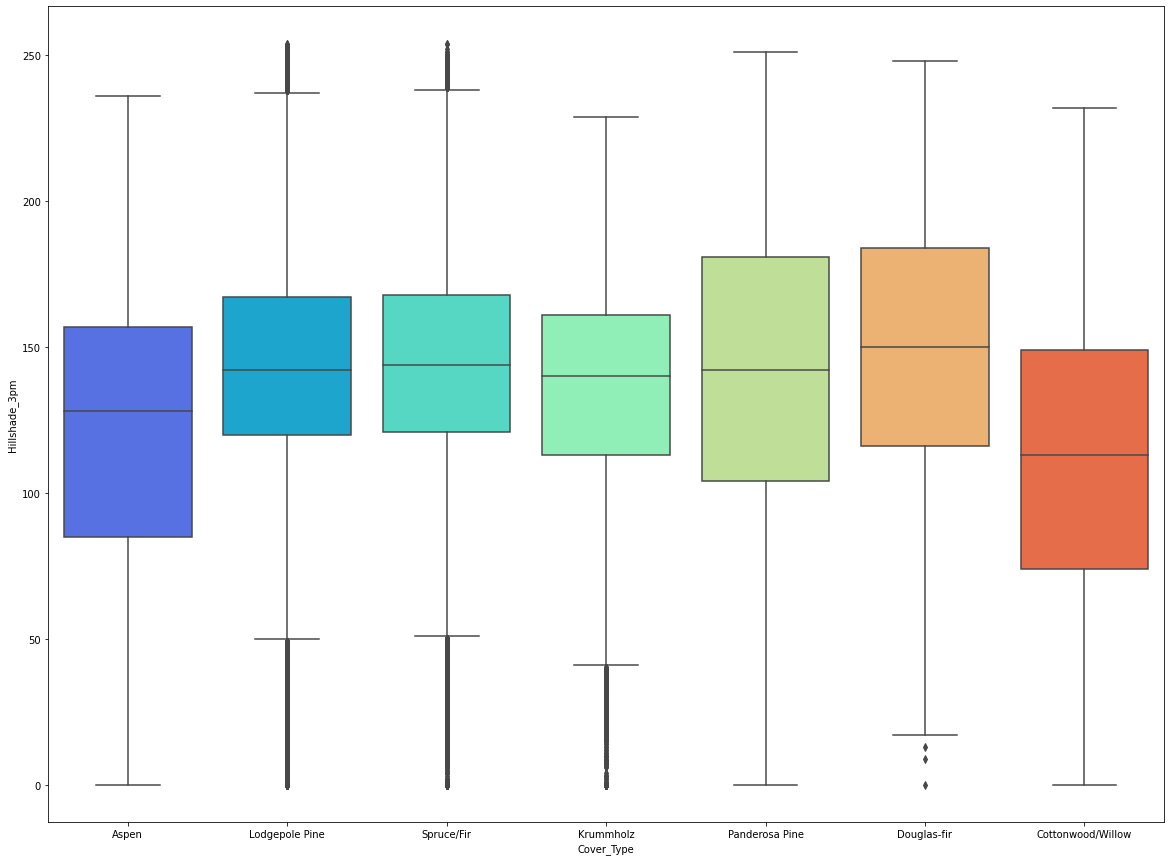

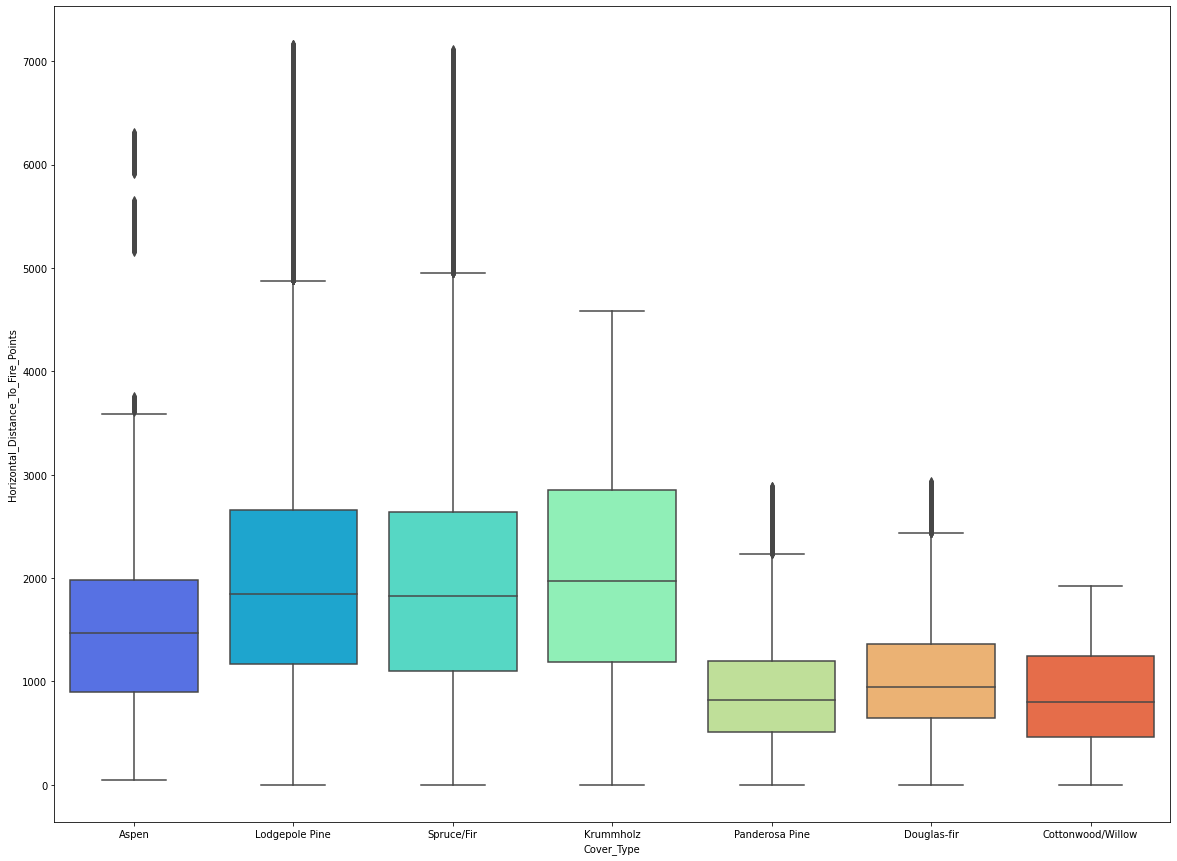

In [13]:
#Boxplots of our target variable with respect to the dependent continous features.
for feature in continuous_features:
    plt.figure(figsize=(20,15))
    sns.boxplot(x='Cover_Type',y=feature,data=df,palette='rainbow')
    plt.show()

**Observations:** Not Much variance in the distrbution of classes. Elevation is probably the most important feature in classification.

### 2.3 Continuous Features

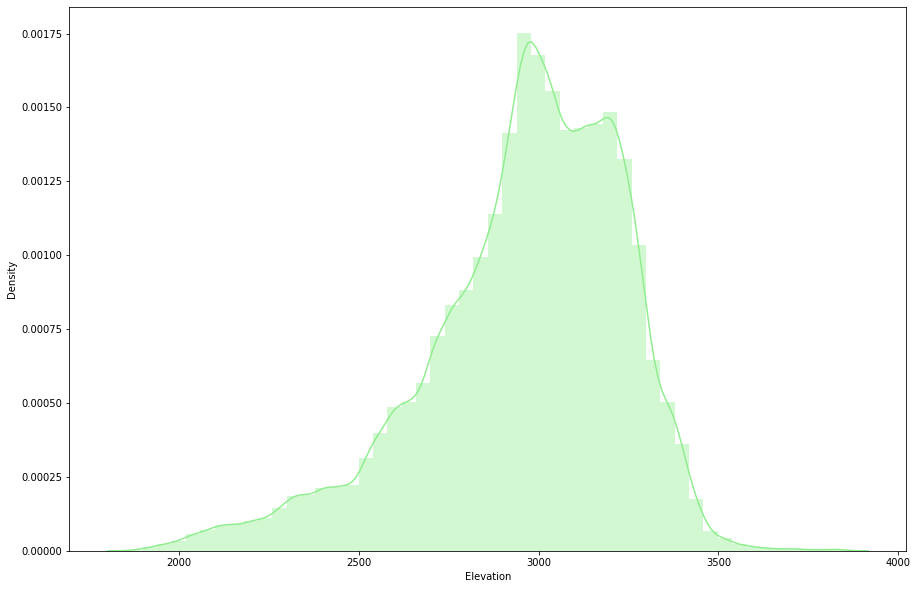

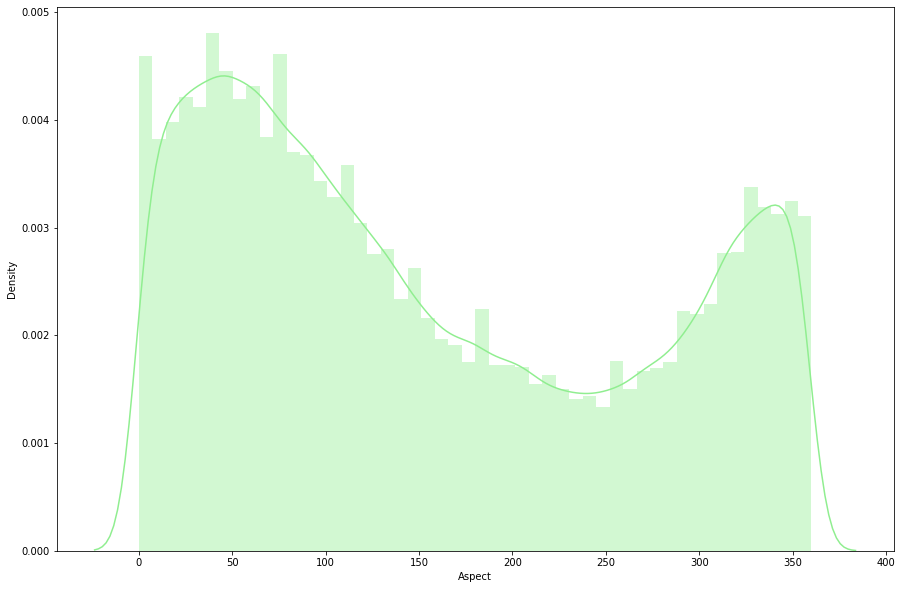

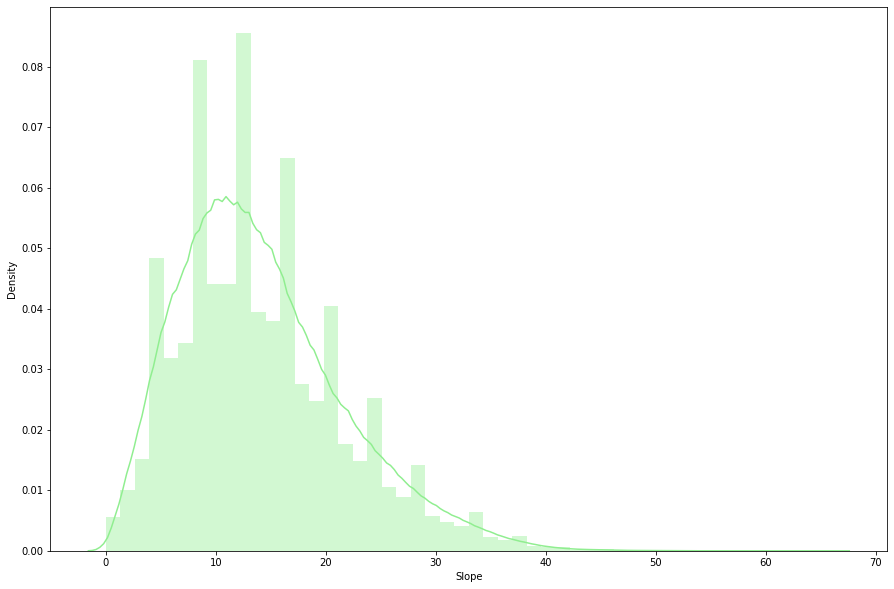

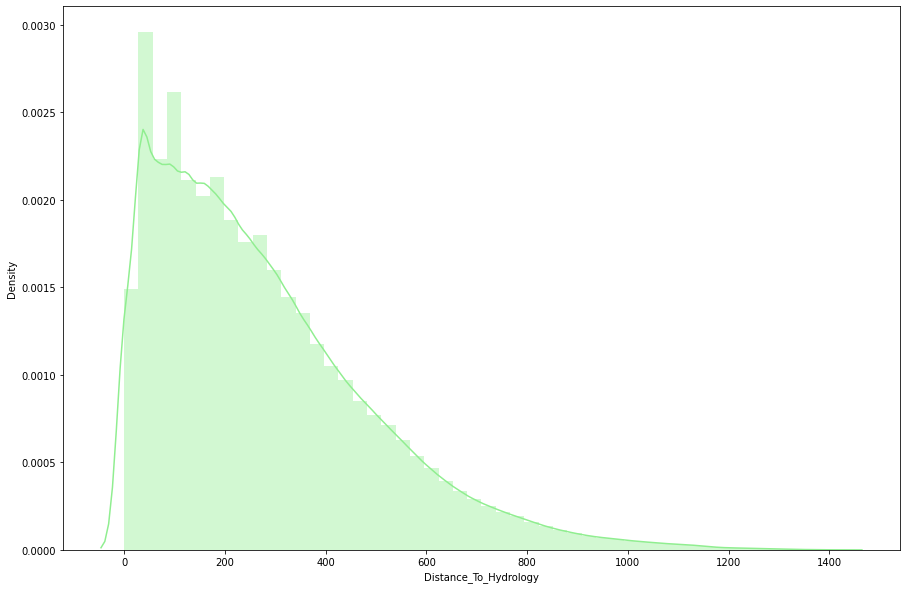

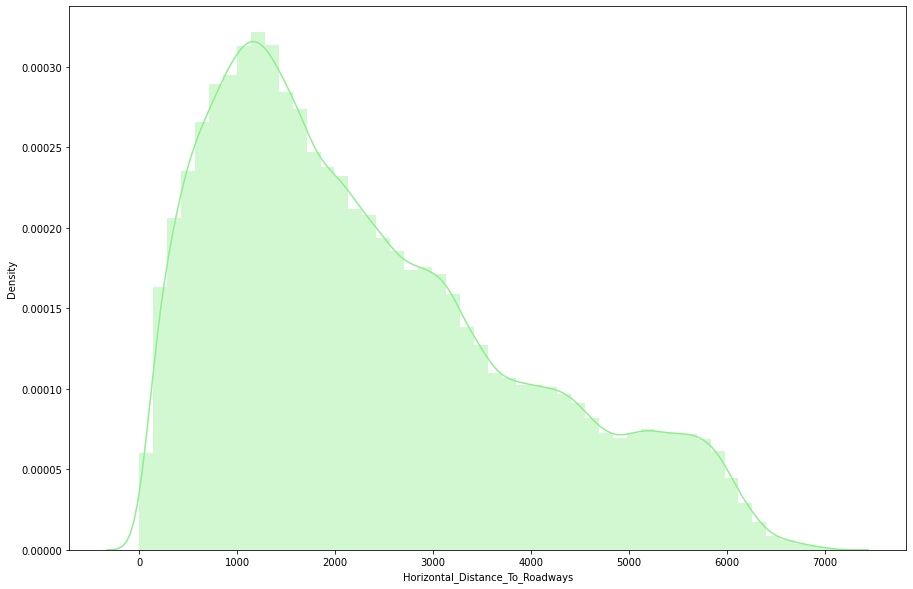

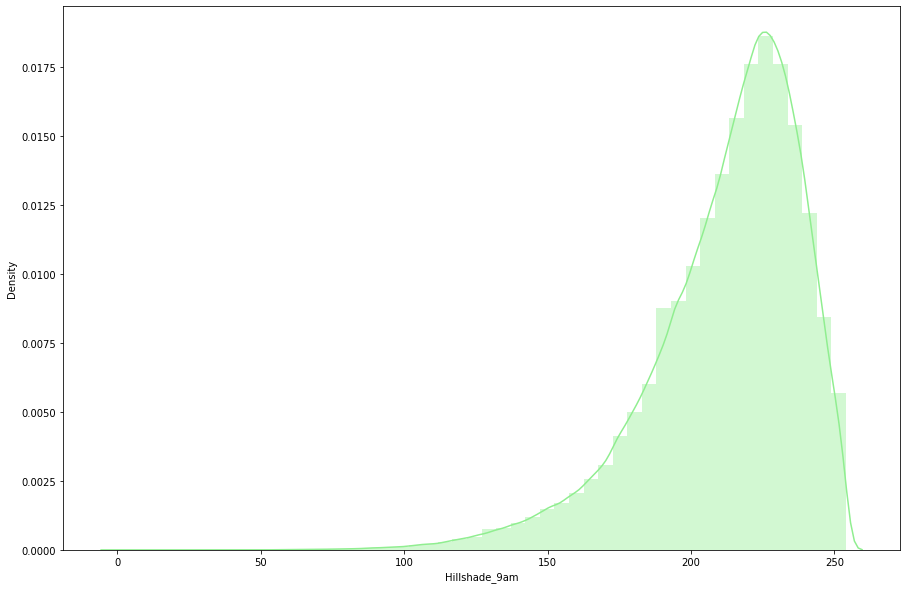

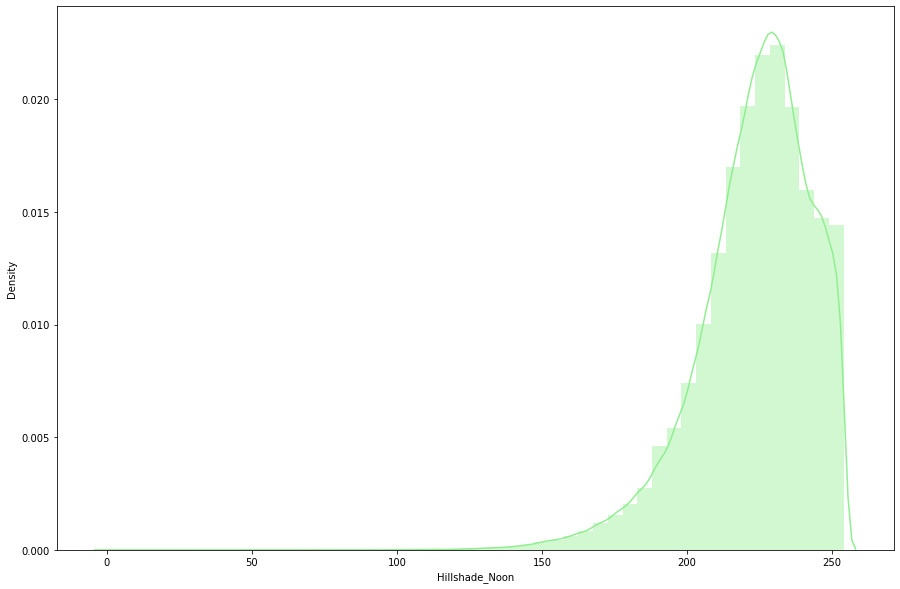

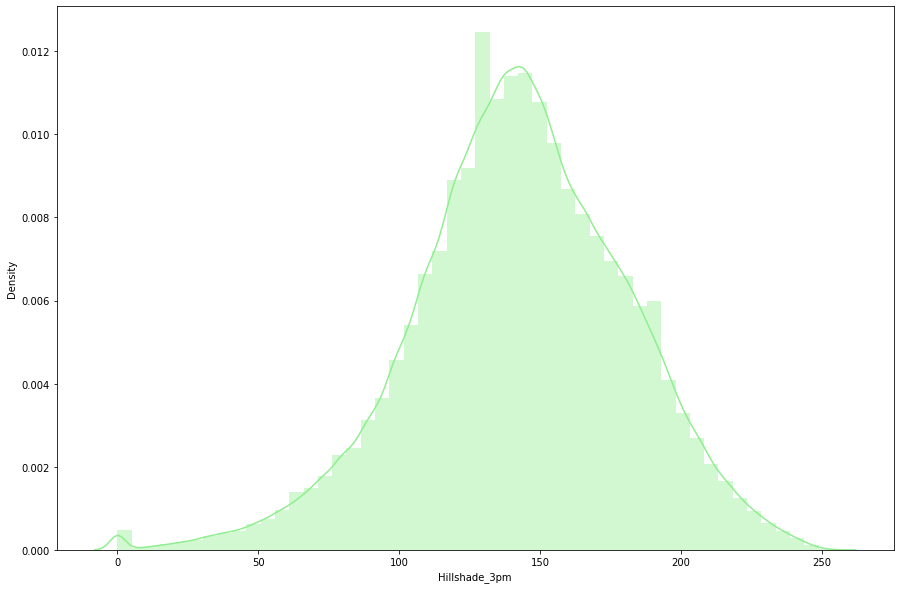

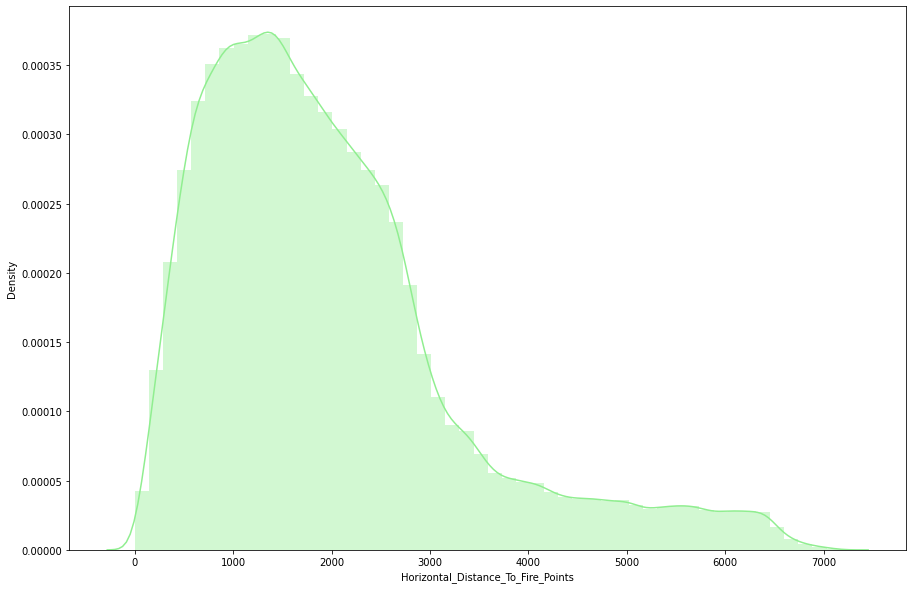

In [14]:
#Let's see the distribution of our numerical features .
for feature in continuous_features:
    plt.figure(figsize=(15,10))
    sns.distplot(df[feature],color='lightgreen')
    plt.xlabel(feature)
    plt.show()

### 2.4 Discrete Features

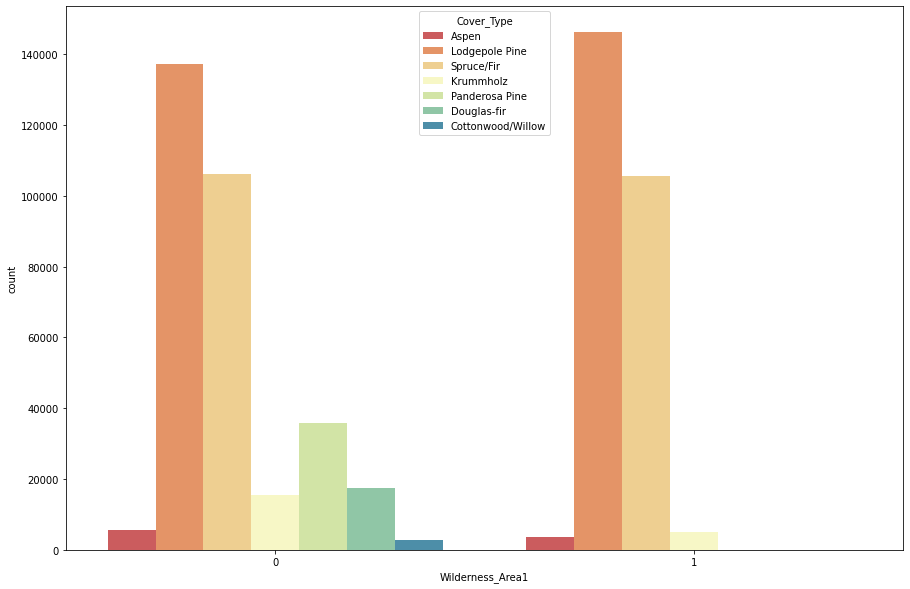

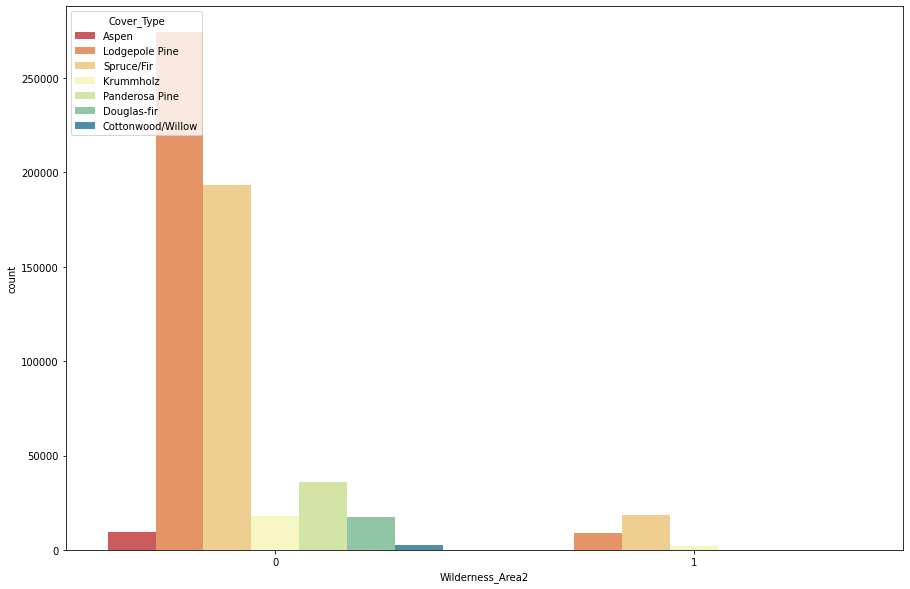

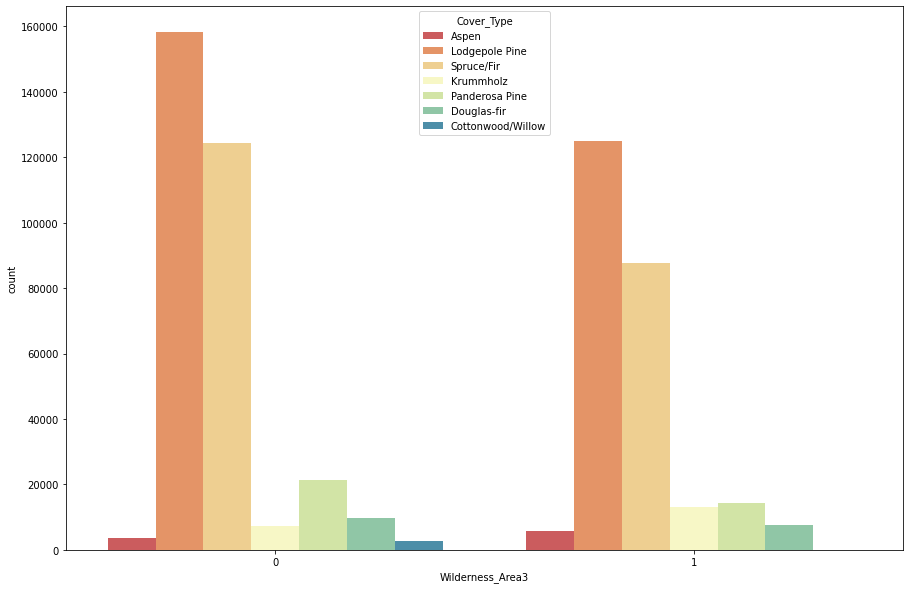

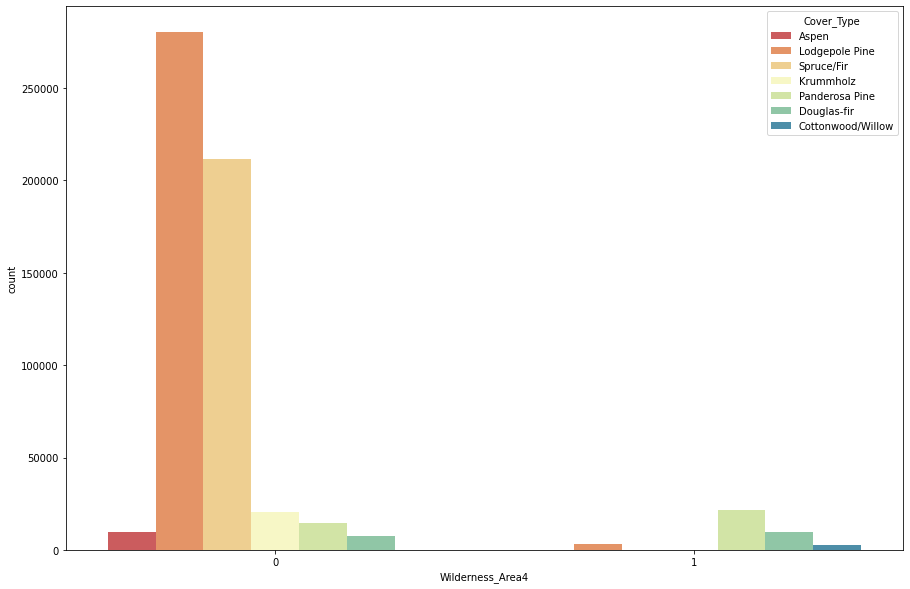

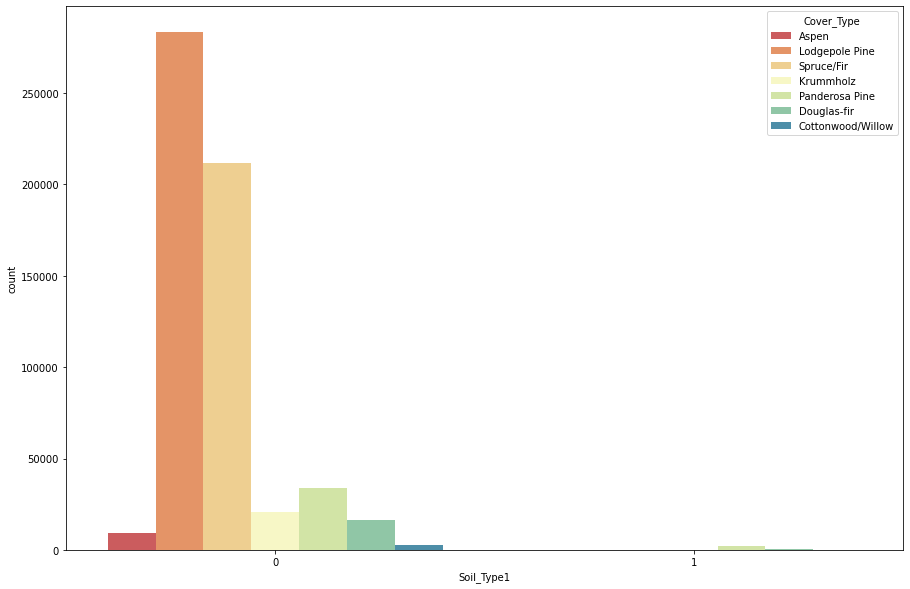

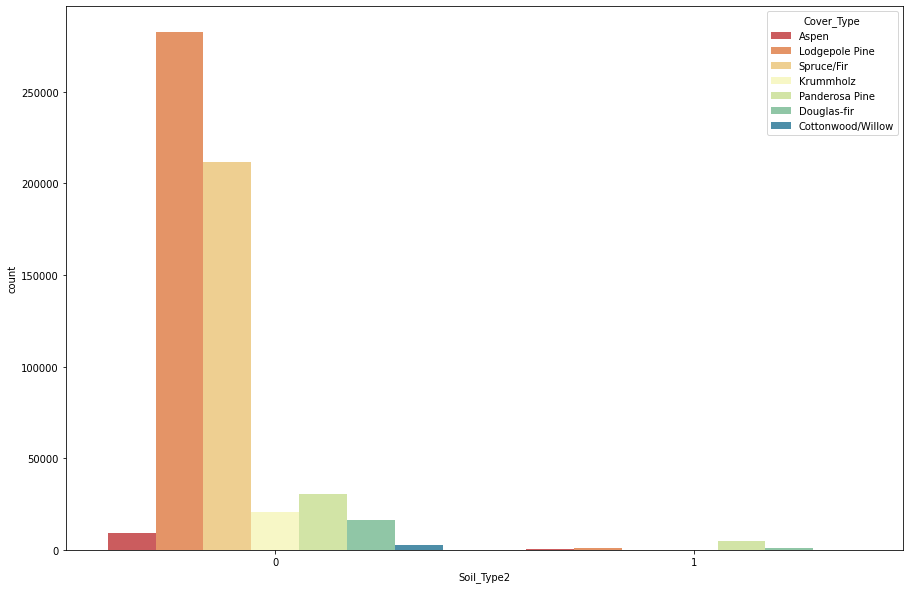

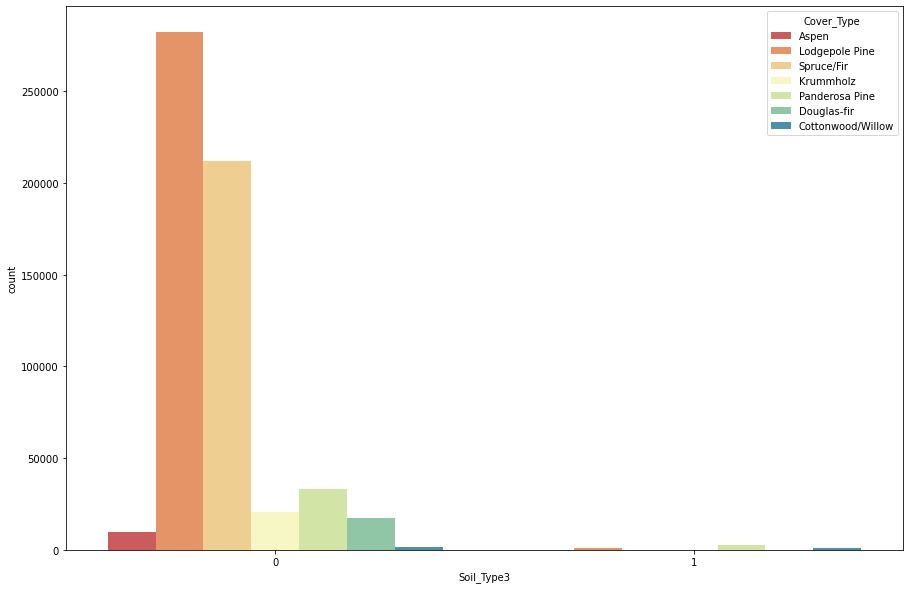

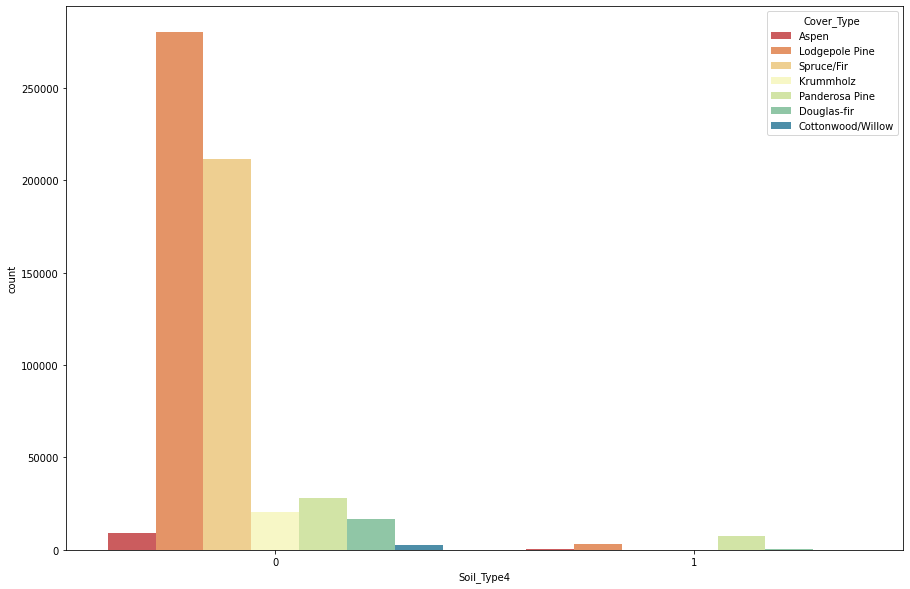

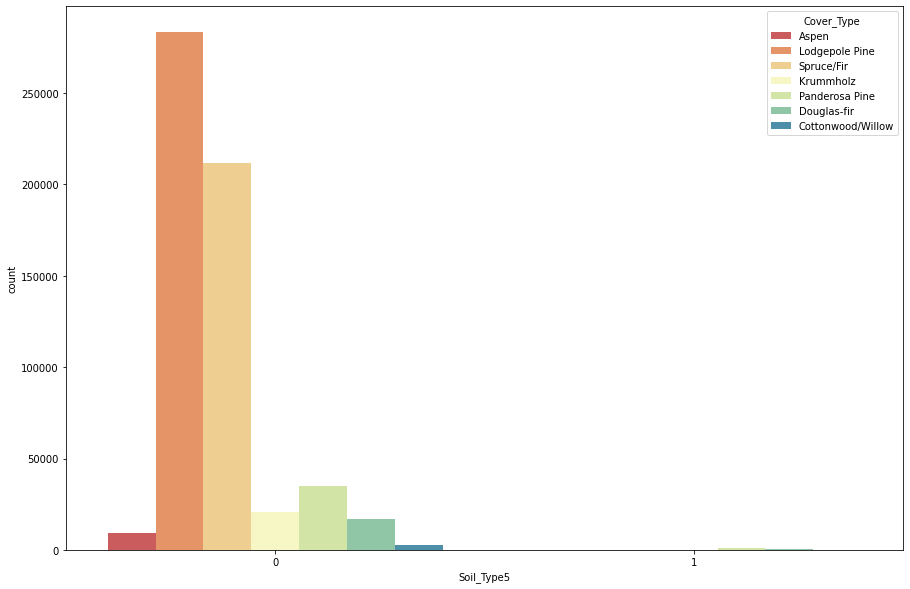

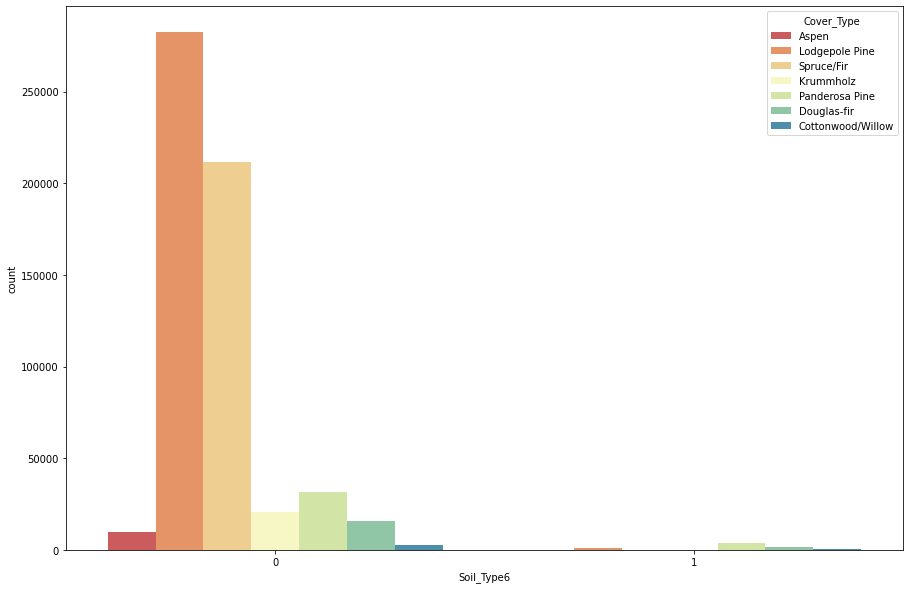

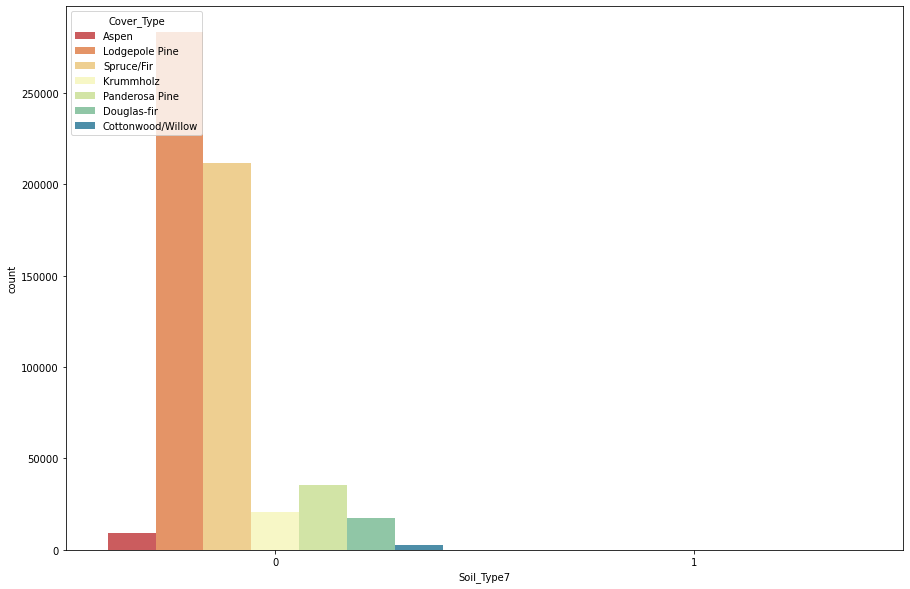

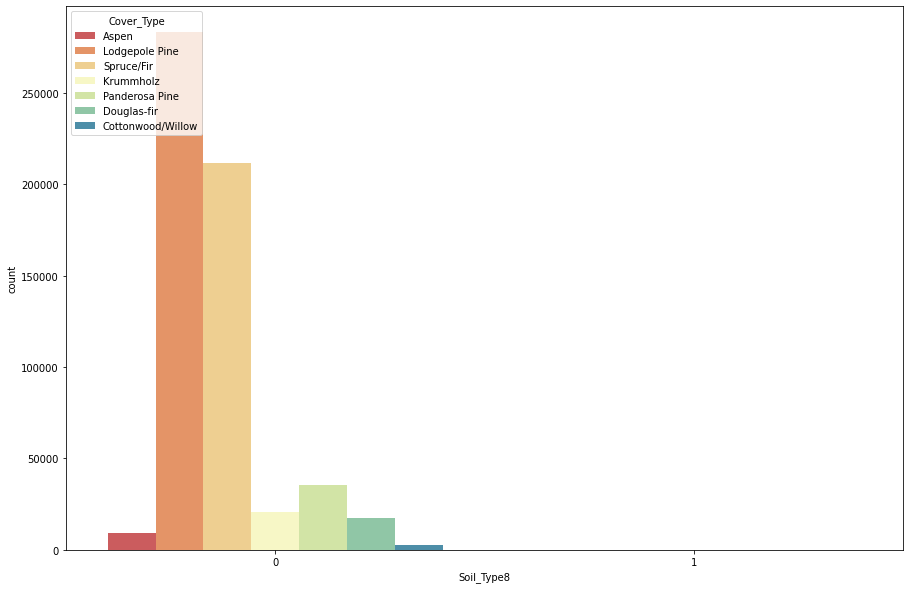

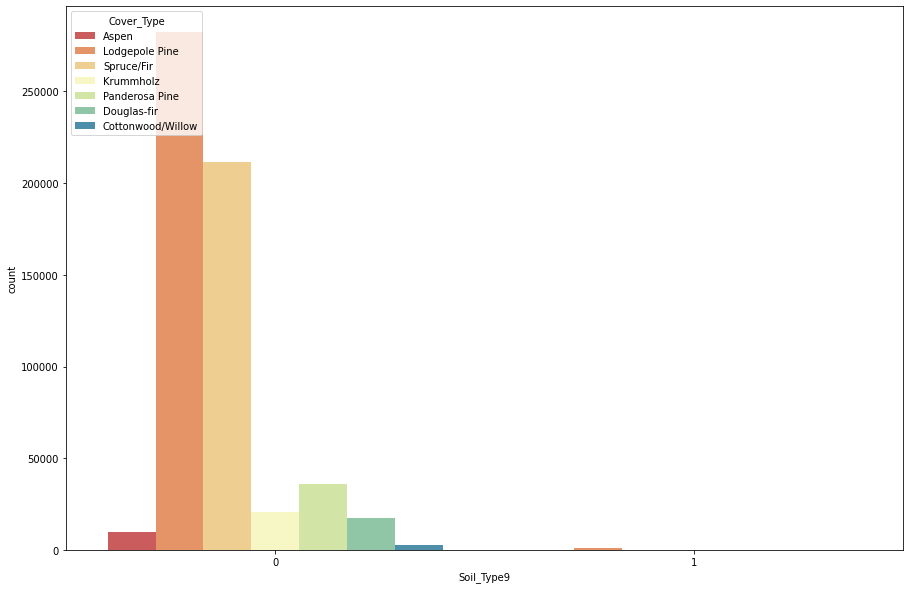

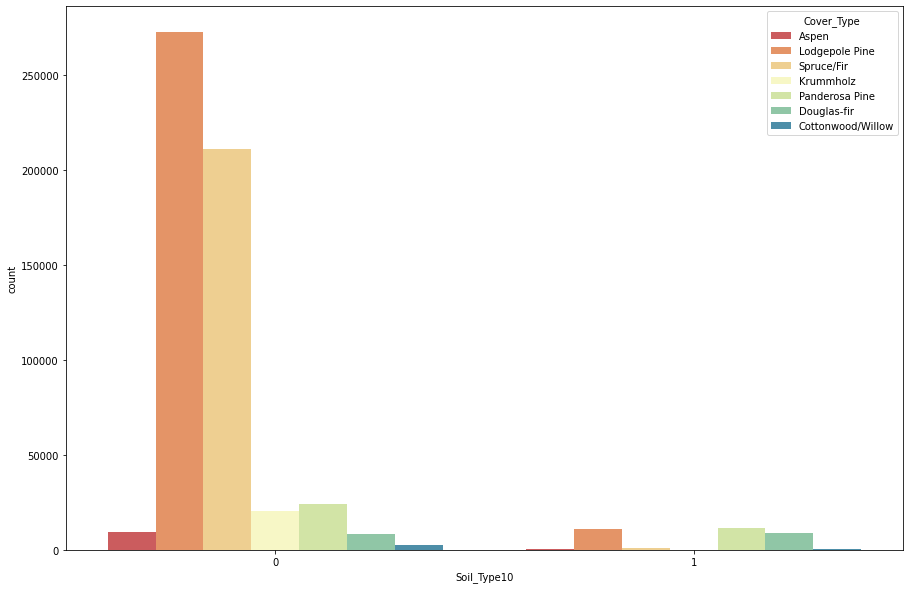

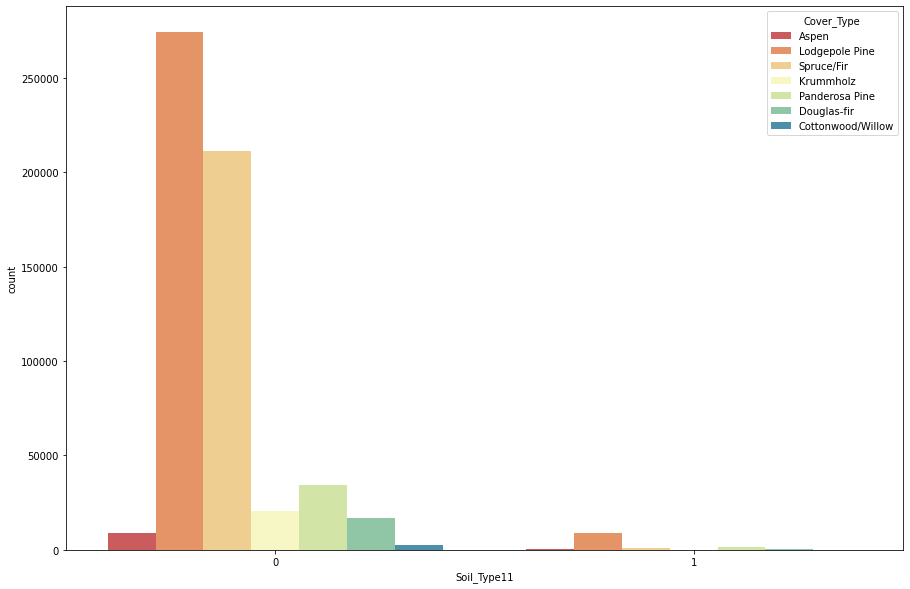

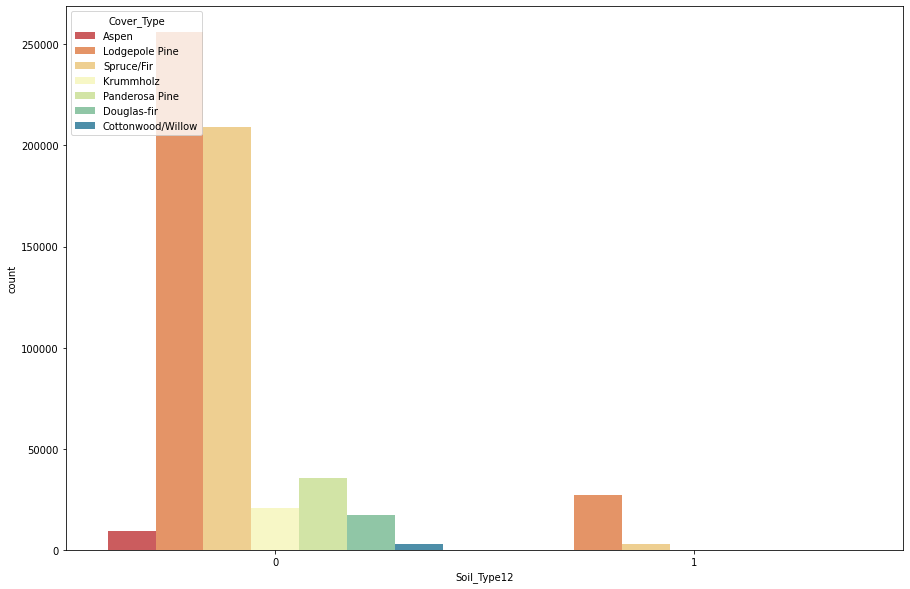

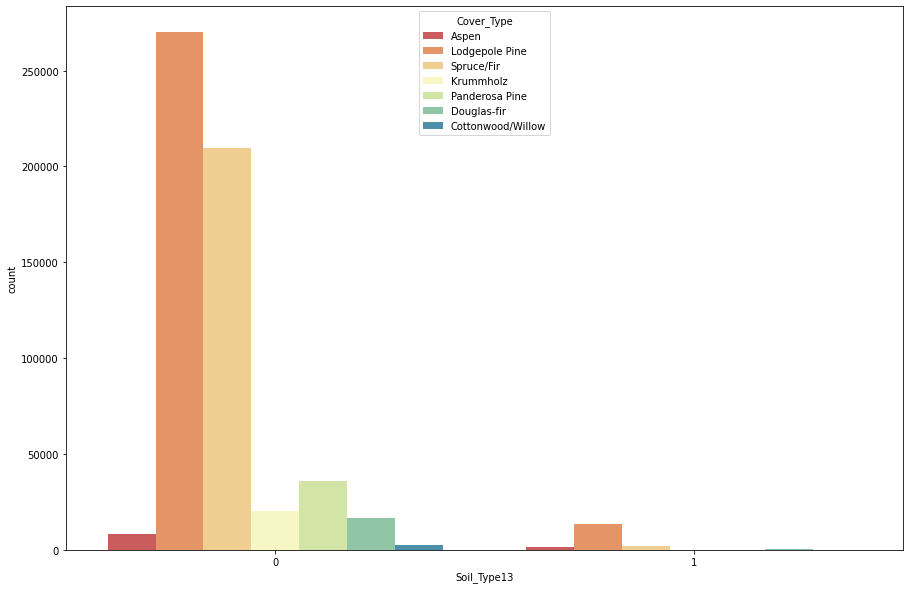

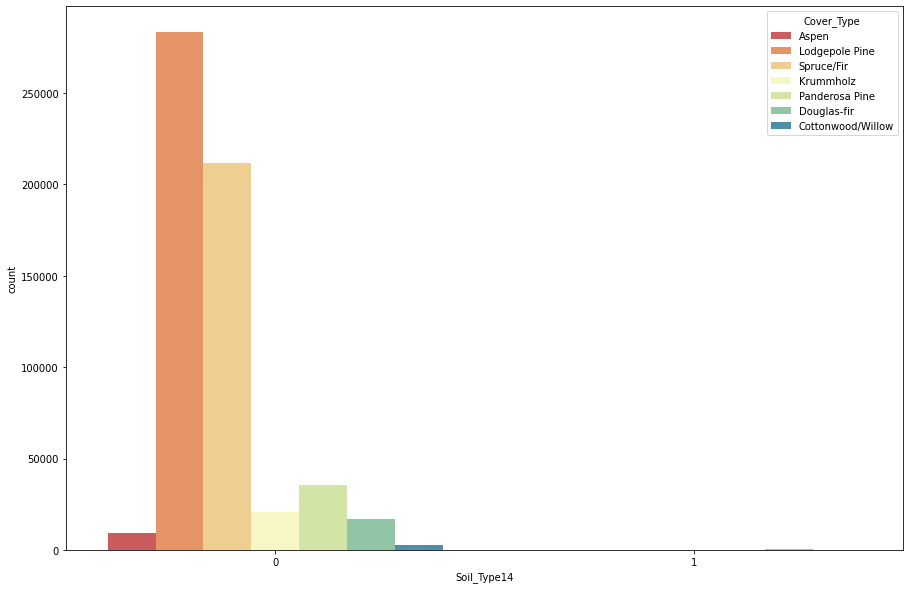

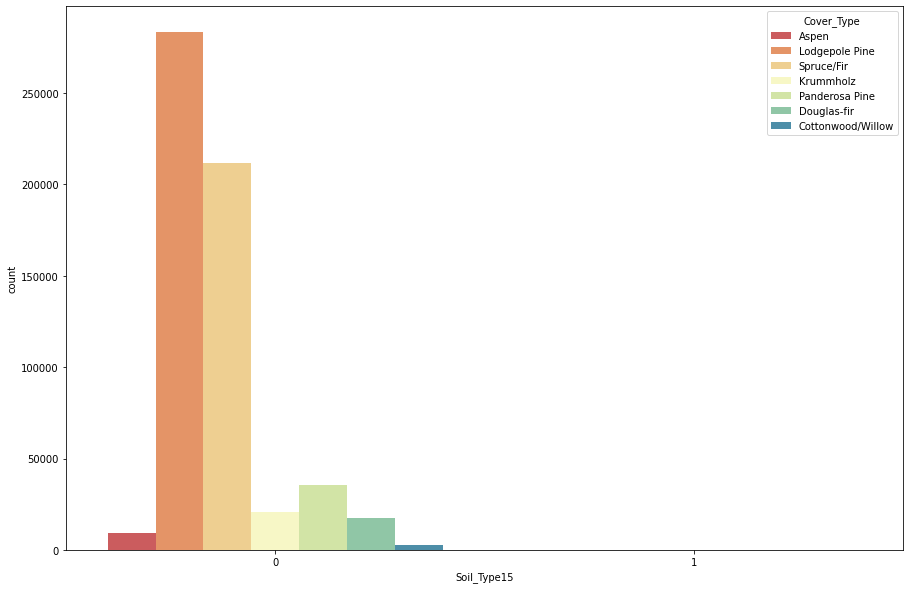

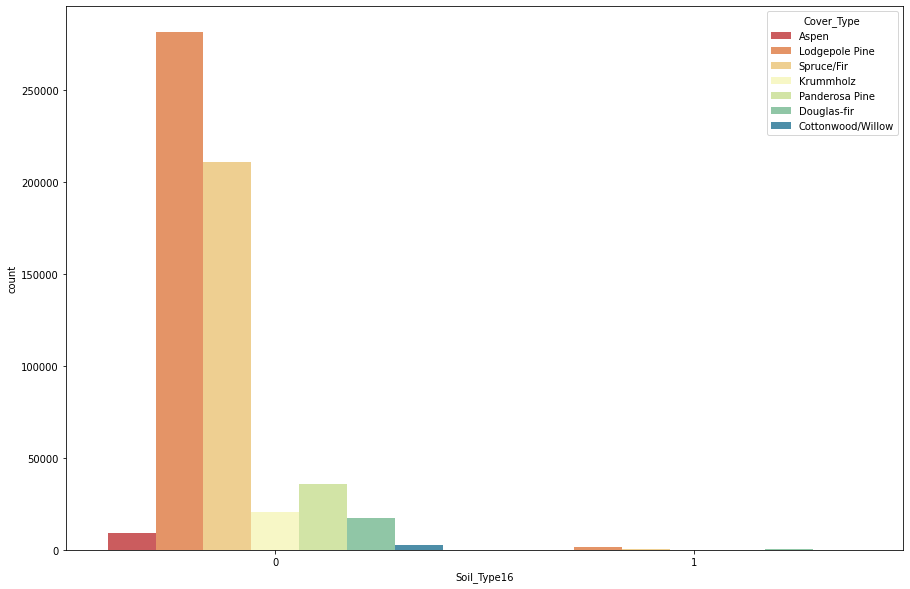

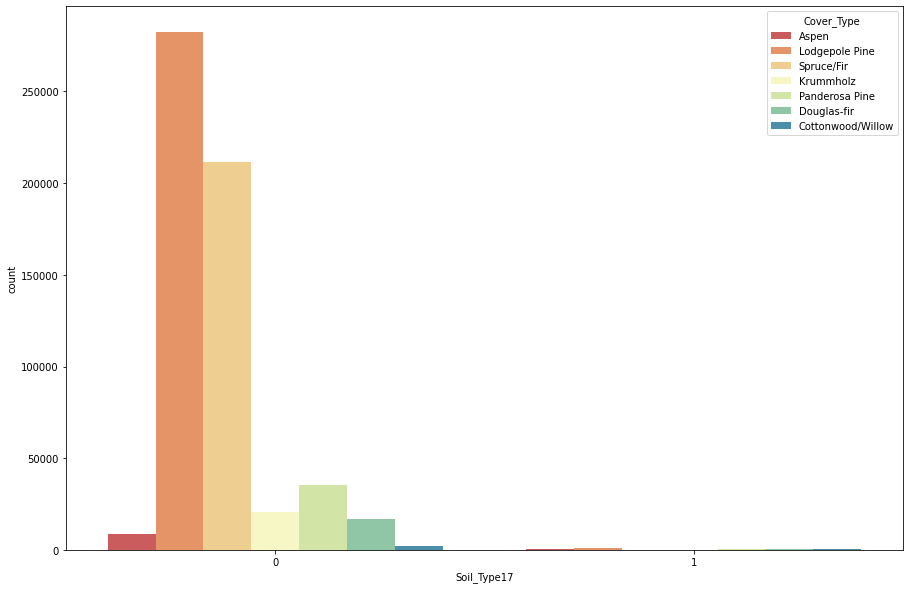

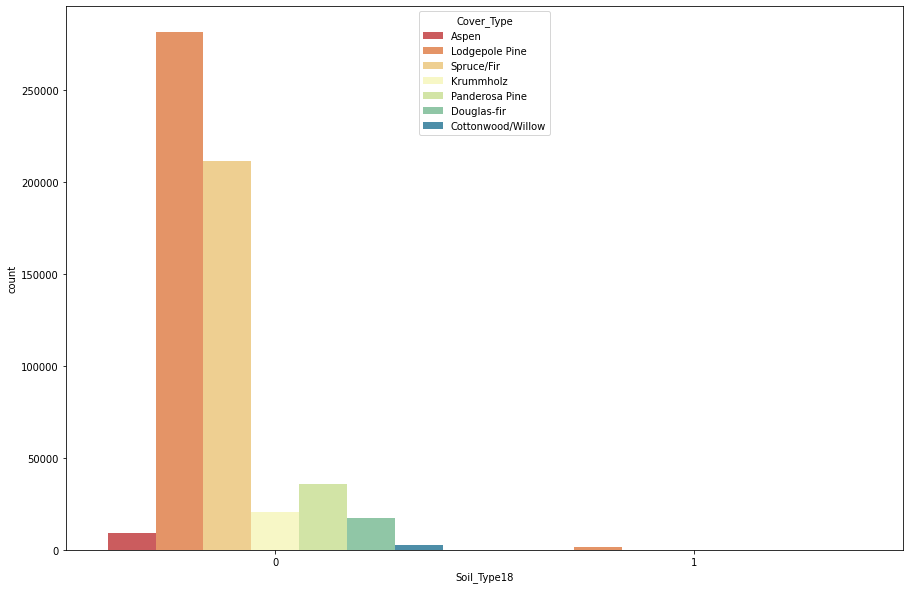

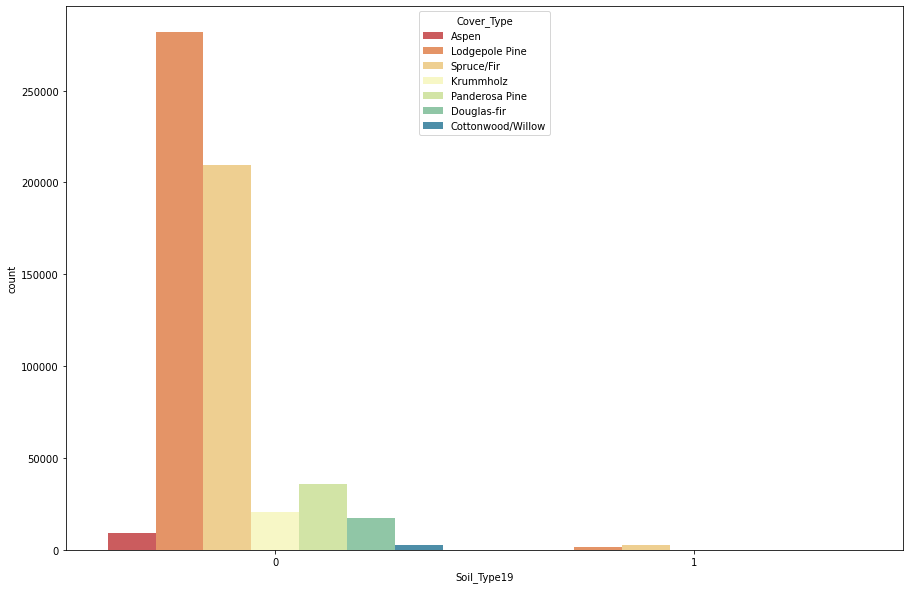

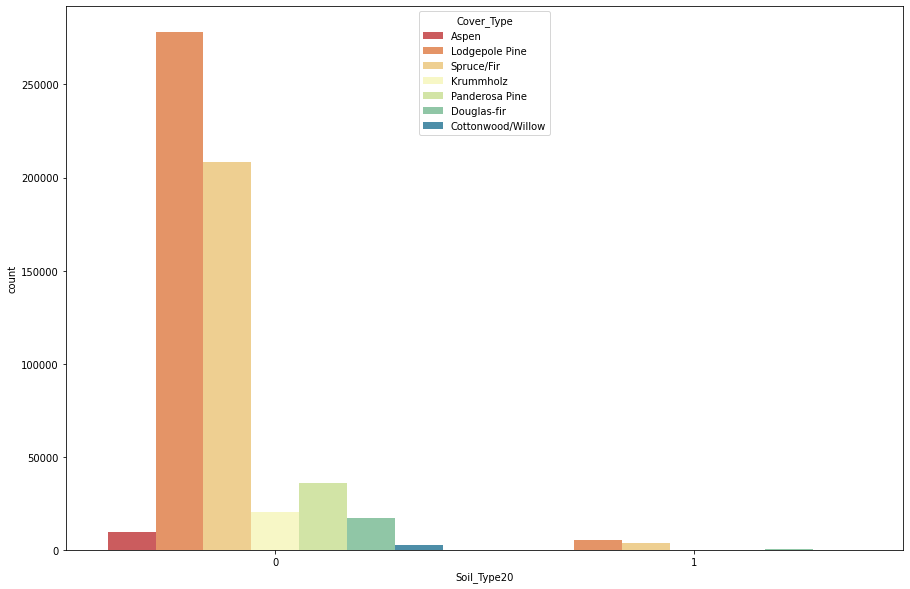

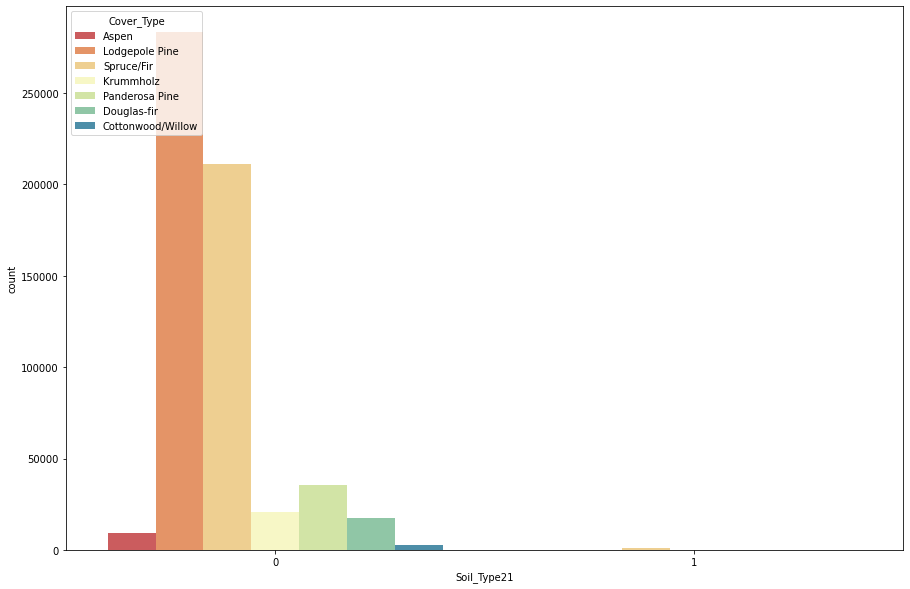

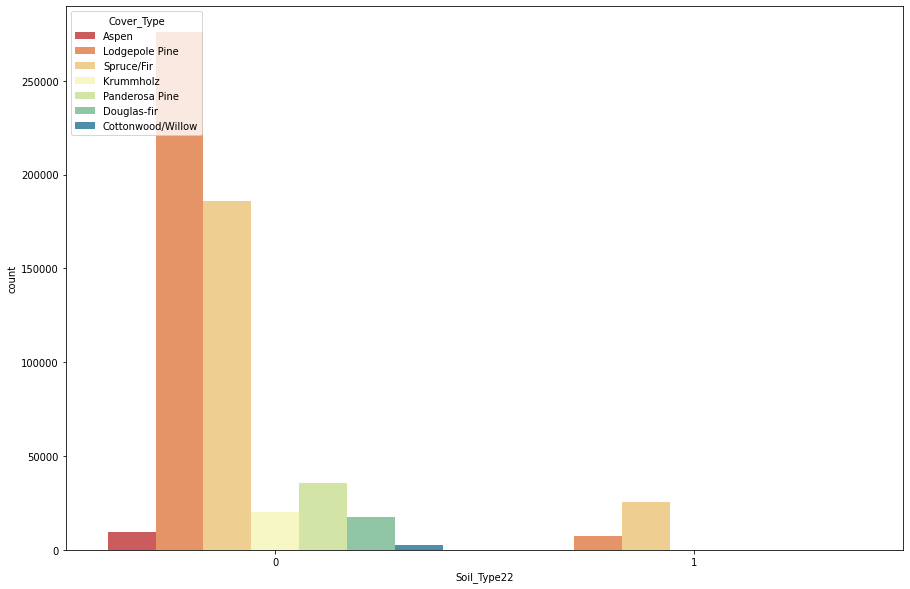

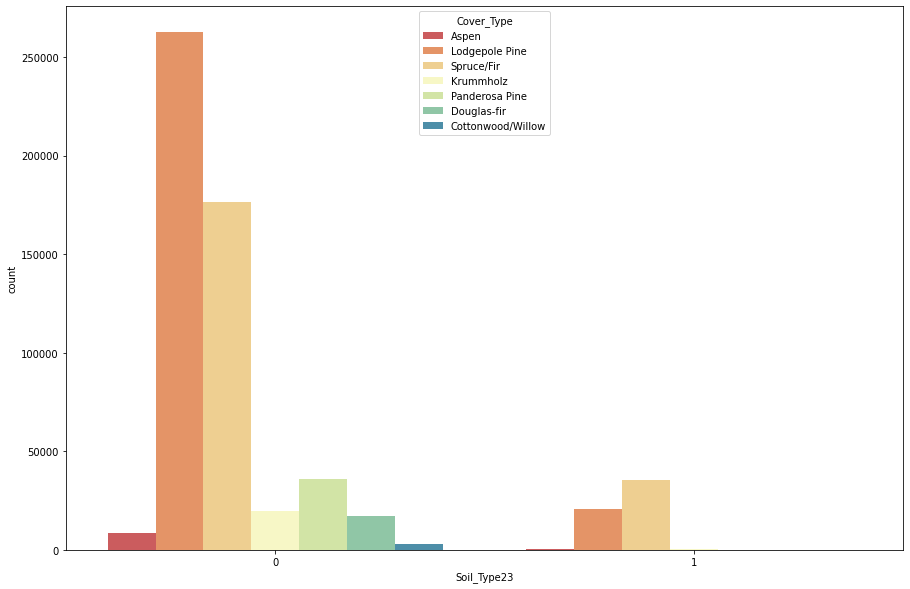

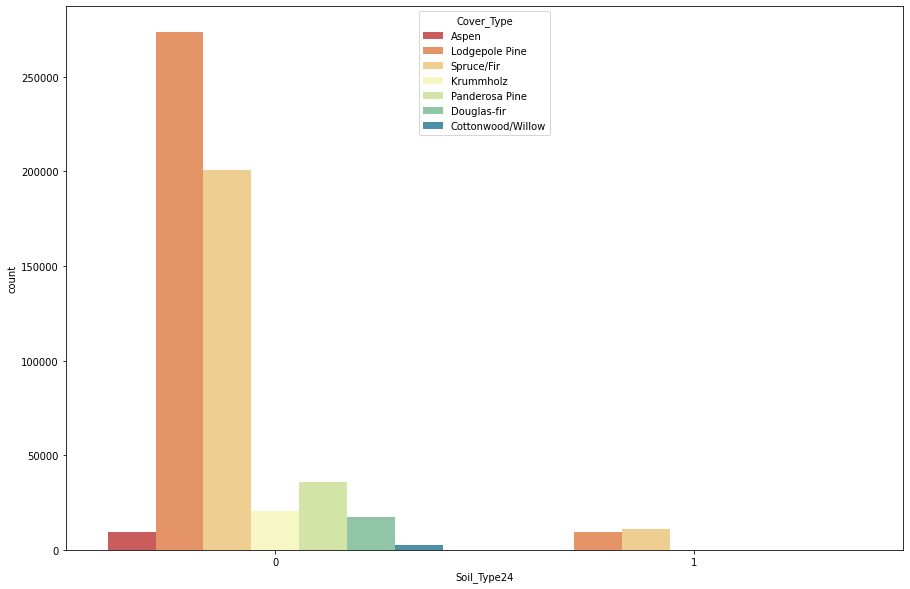

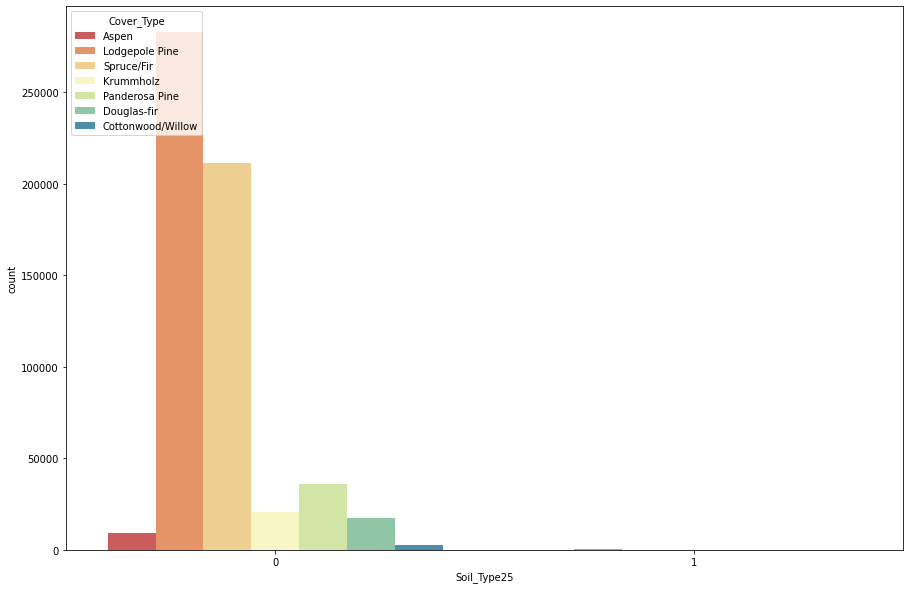

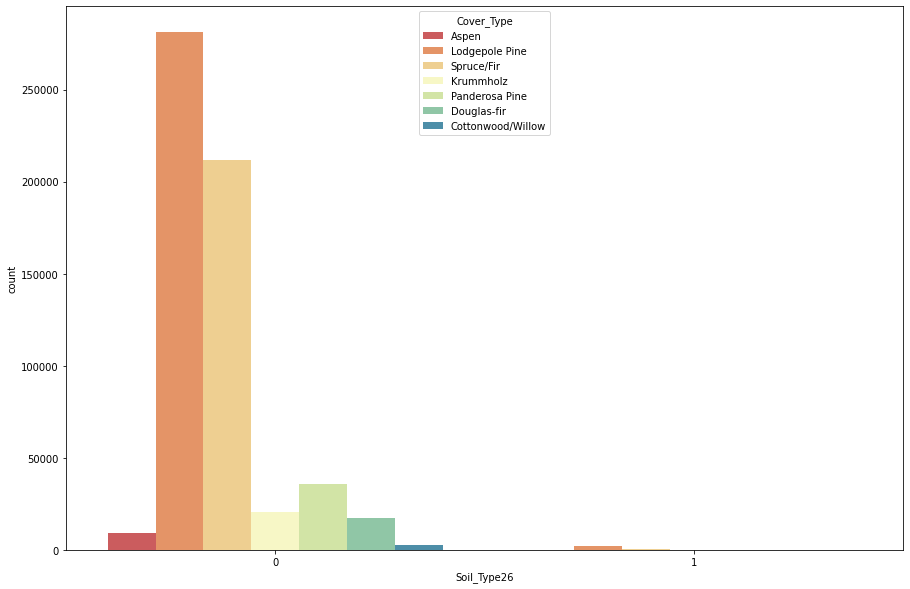

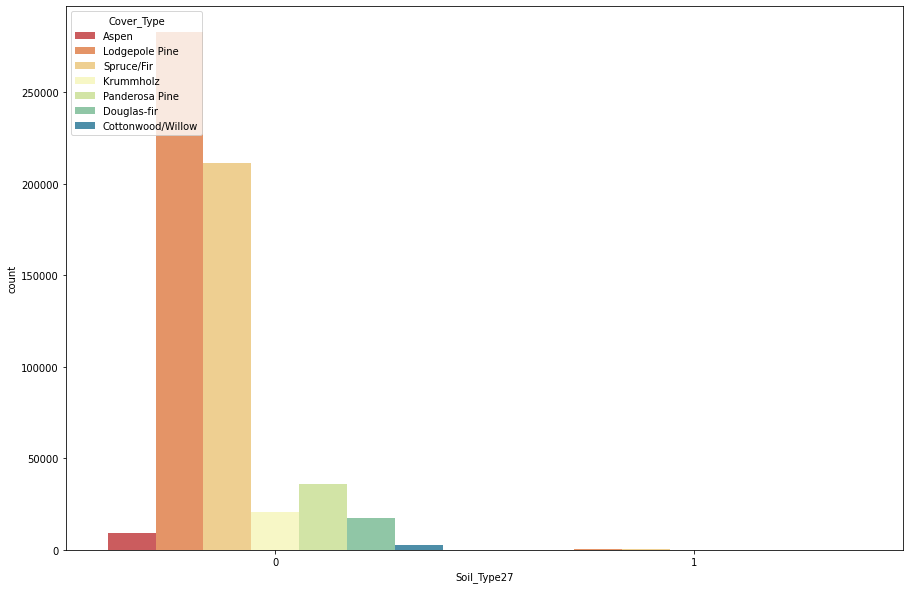

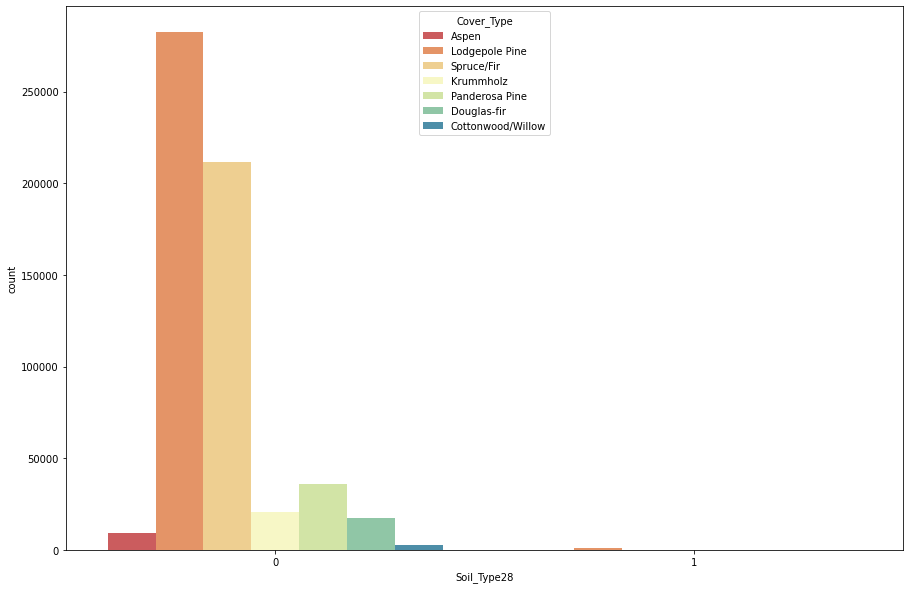

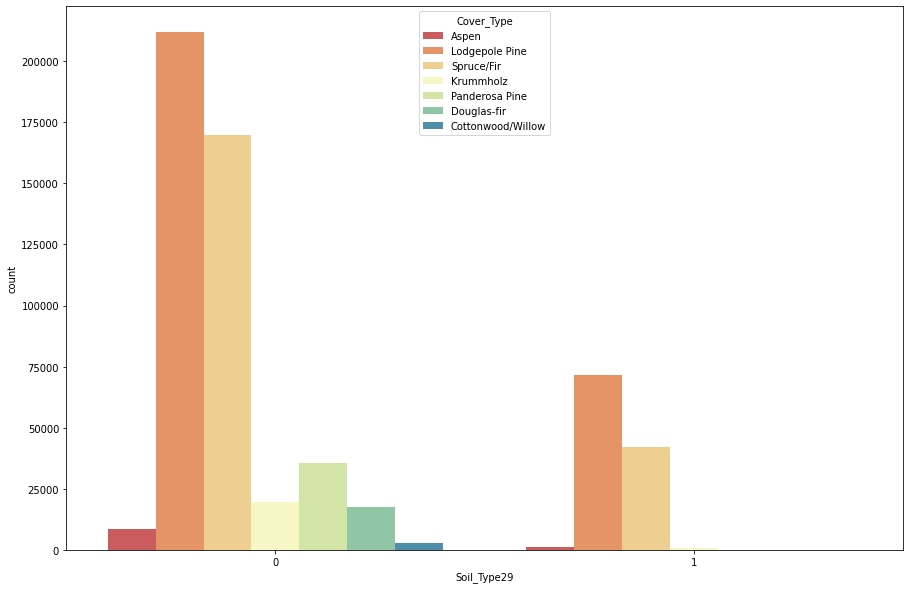

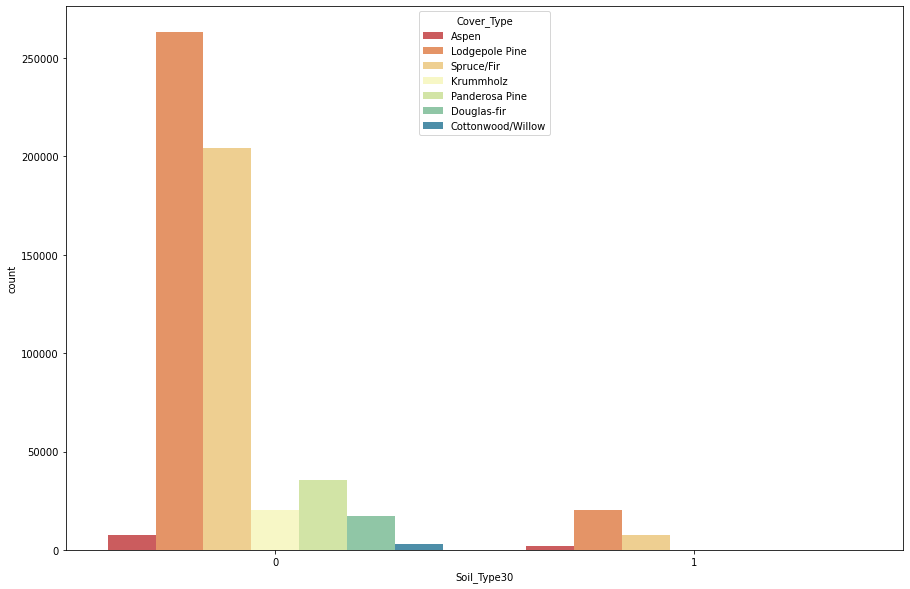

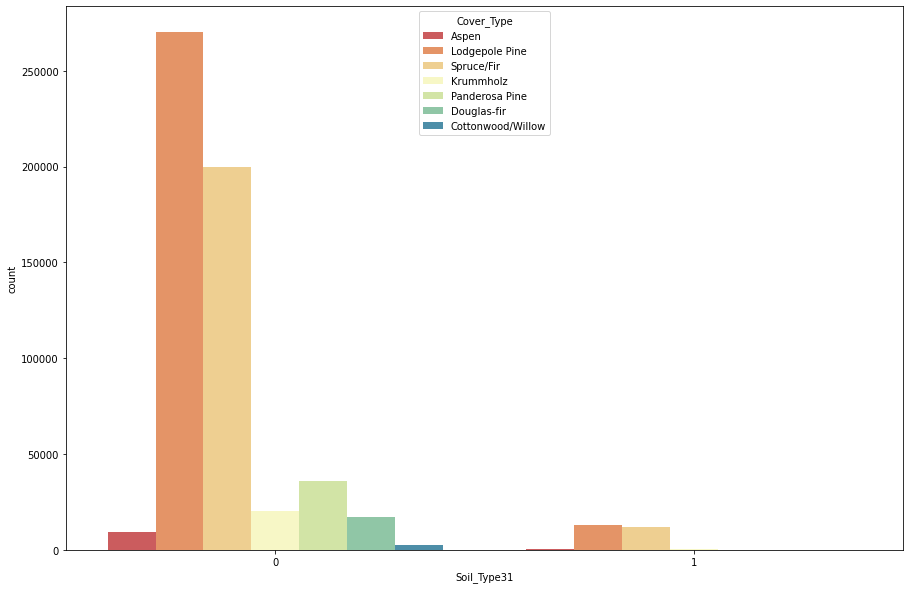

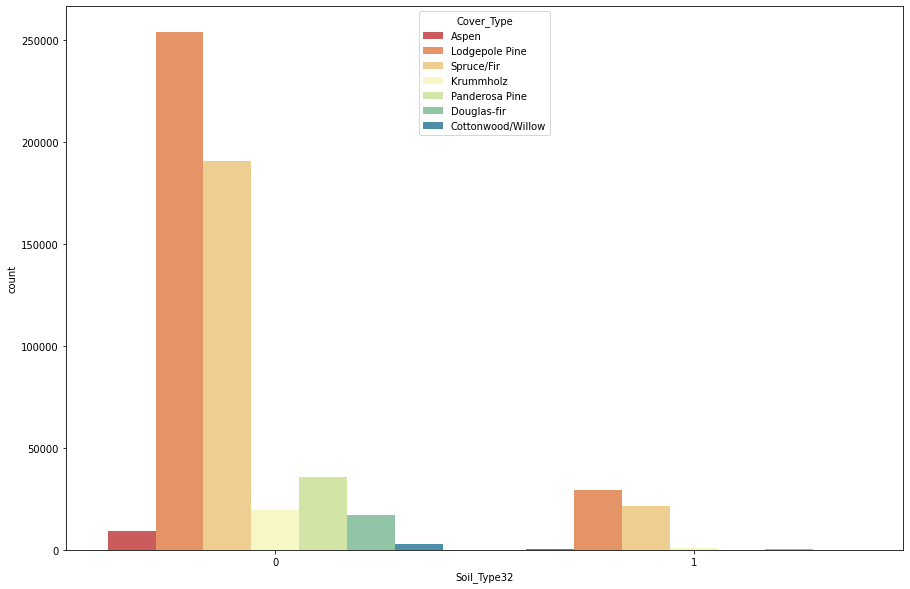

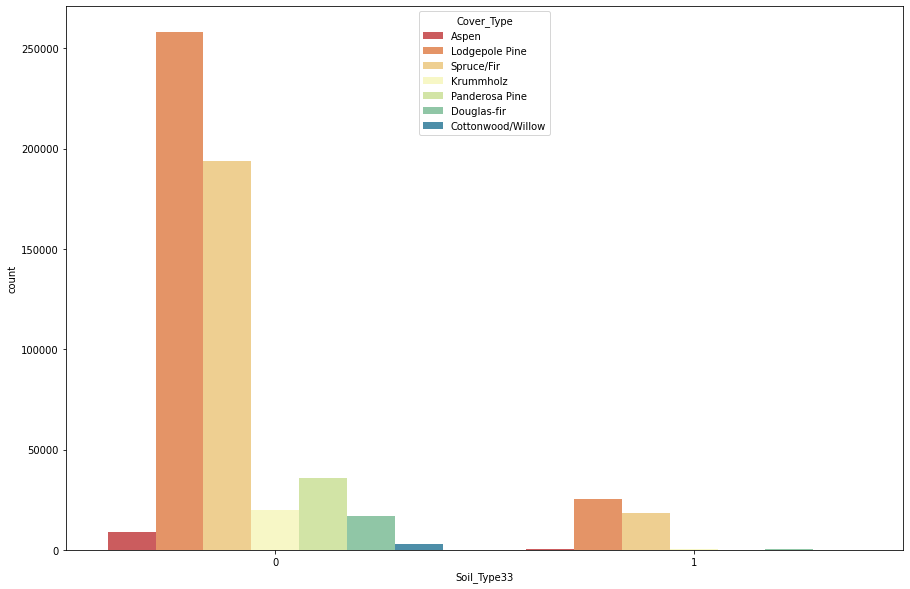

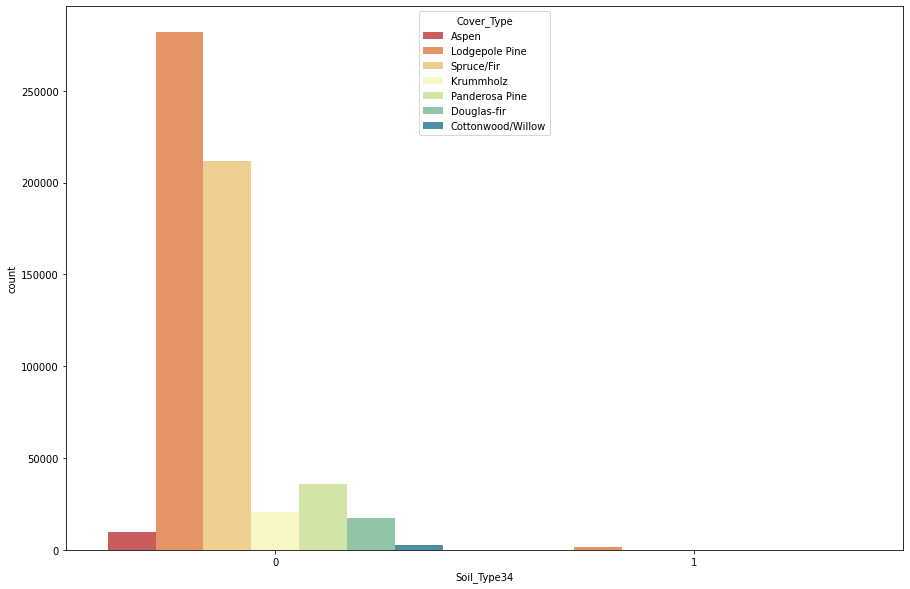

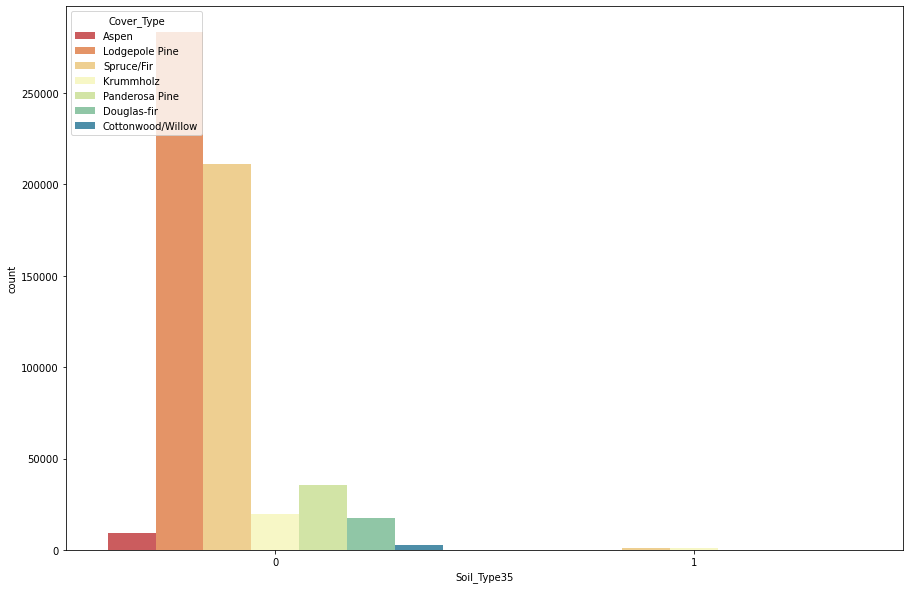

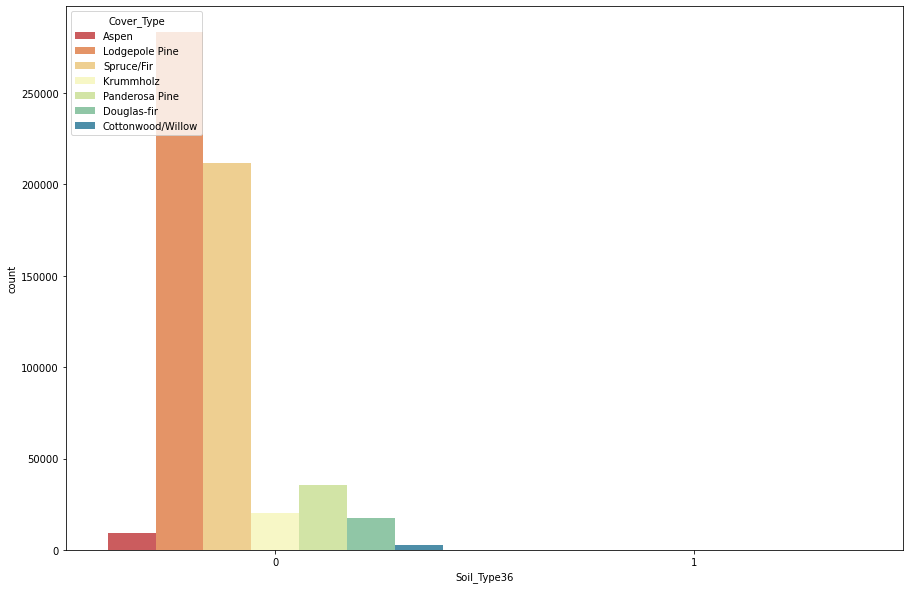

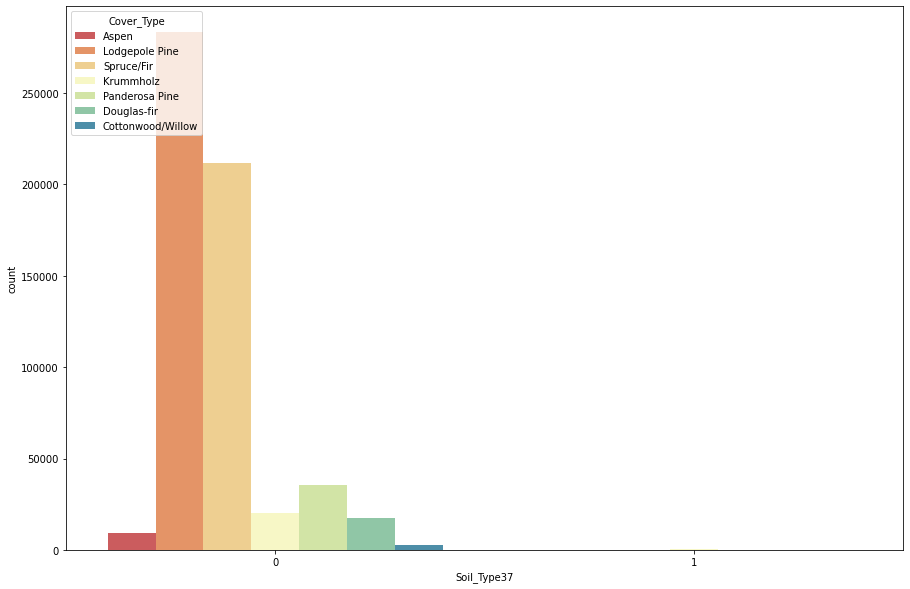

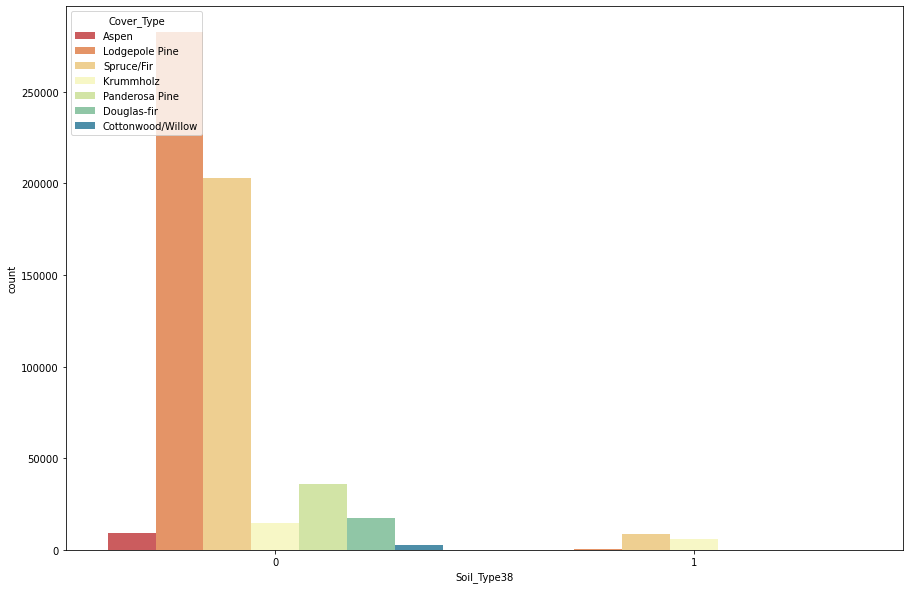

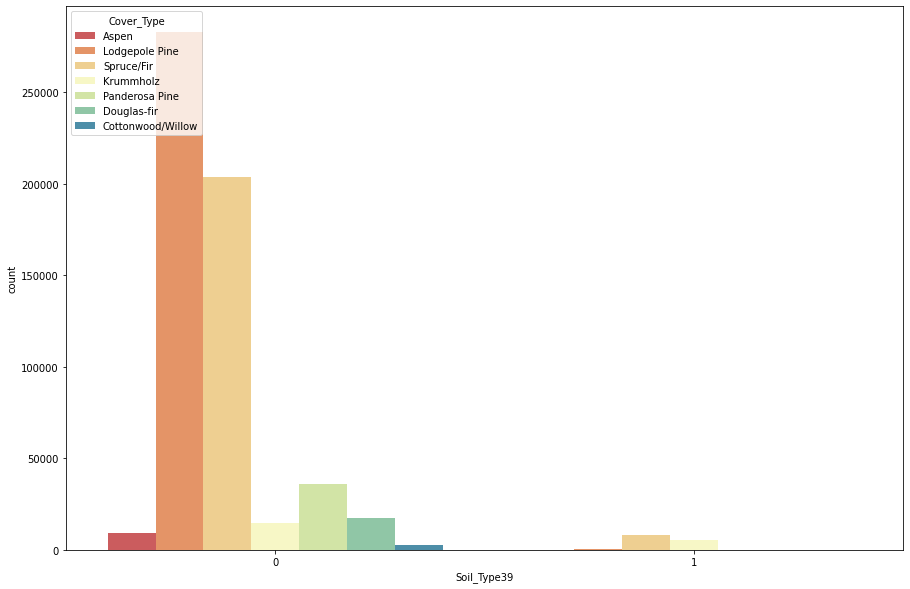

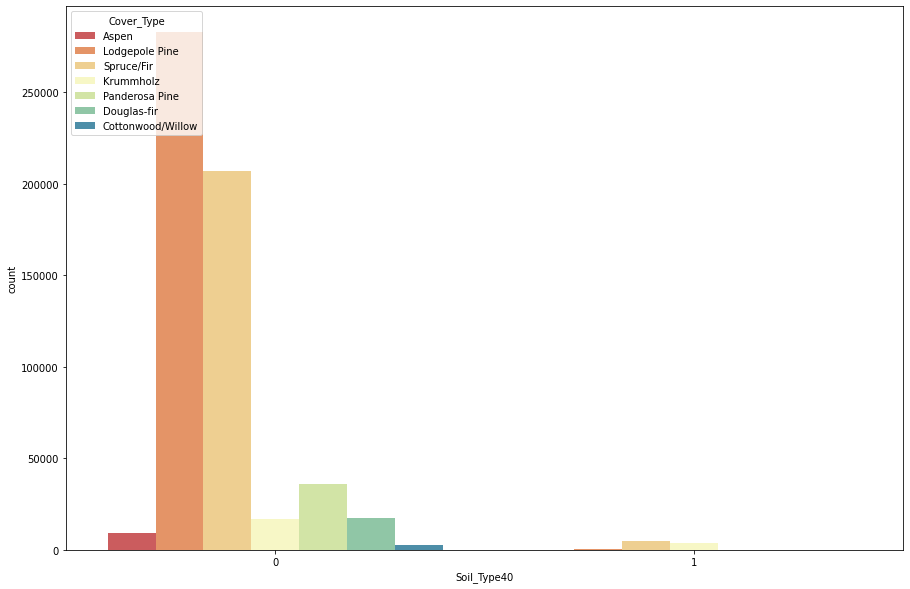

In [15]:
discrete_features = [feature for feature in df.columns if feature not in ['Elevation','Aspect','Slope','Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type']]
for feature in discrete_features:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df[feature],hue=df['Cover_Type'],data=df,palette='Spectral')
    plt.show()

**Observations:** 
* Most of the trees are found in Wilderness_Area1 and Wilderness_Area3 i.e Rawah Wilderness Area and Comanche Peak Wilderness Area
* Classification of trees based on soil type is difficult to interpret because of vast soil types. Let's check them numerically.

In [16]:
soil_features = [feature for feature in df.columns if feature not in ['Elevation','Aspect','Slope','Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]

In [17]:
for feature in soil_features:
    print(df[feature].value_counts())

0    577981
1      3031
Name: Soil_Type1, dtype: int64
0    573487
1      7525
Name: Soil_Type2, dtype: int64
0    576189
1      4823
Name: Soil_Type3, dtype: int64
0    568616
1     12396
Name: Soil_Type4, dtype: int64
0    579415
1      1597
Name: Soil_Type5, dtype: int64
0    574437
1      6575
Name: Soil_Type6, dtype: int64
0    580907
1       105
Name: Soil_Type7, dtype: int64
0    580833
1       179
Name: Soil_Type8, dtype: int64
0    579865
1      1147
Name: Soil_Type9, dtype: int64
0    548378
1     32634
Name: Soil_Type10, dtype: int64
0    568602
1     12410
Name: Soil_Type11, dtype: int64
0    551041
1     29971
Name: Soil_Type12, dtype: int64
0    563581
1     17431
Name: Soil_Type13, dtype: int64
0    580413
1       599
Name: Soil_Type14, dtype: int64
0    581009
1         3
Name: Soil_Type15, dtype: int64
0    578167
1      2845
Name: Soil_Type16, dtype: int64
0    577590
1      3422
Name: Soil_Type17, dtype: int64
0    579113
1      1899
Name: Soil_Type18, dtype: int64
0

**Observations:**
* Soil_Type29 has maximum number of trees growing, 115247 trees to be precise.
* Soil_Type15 has least number of trees growing, 3 trees to be precise.

### 2.4 Outlier Analysis

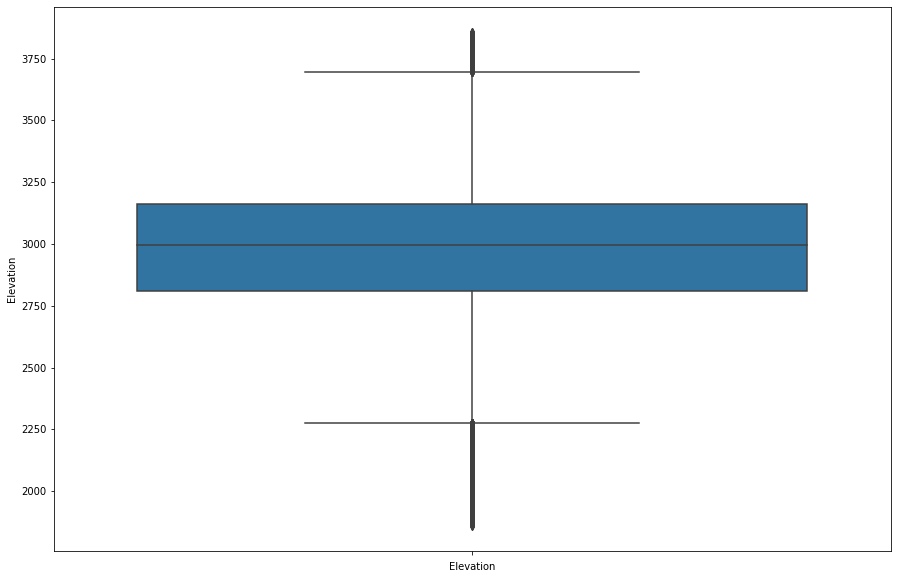

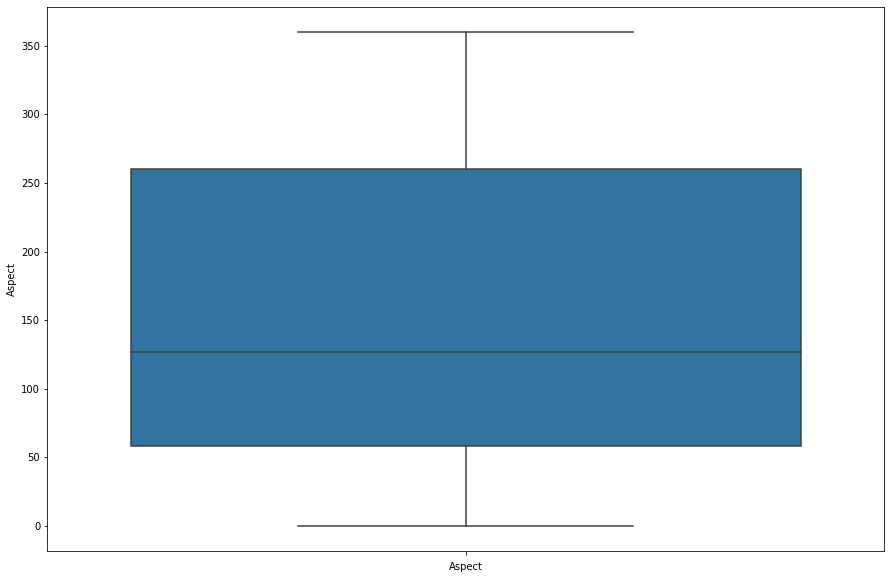

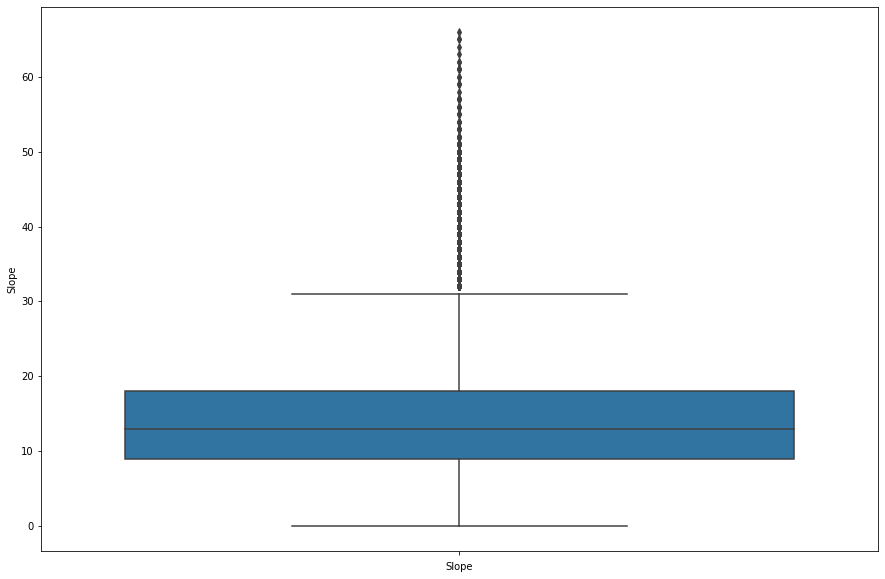

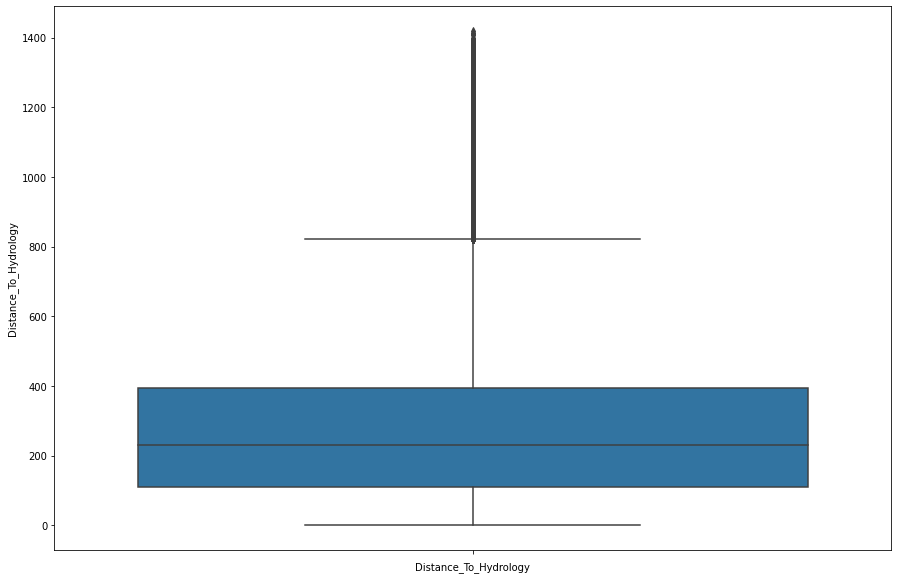

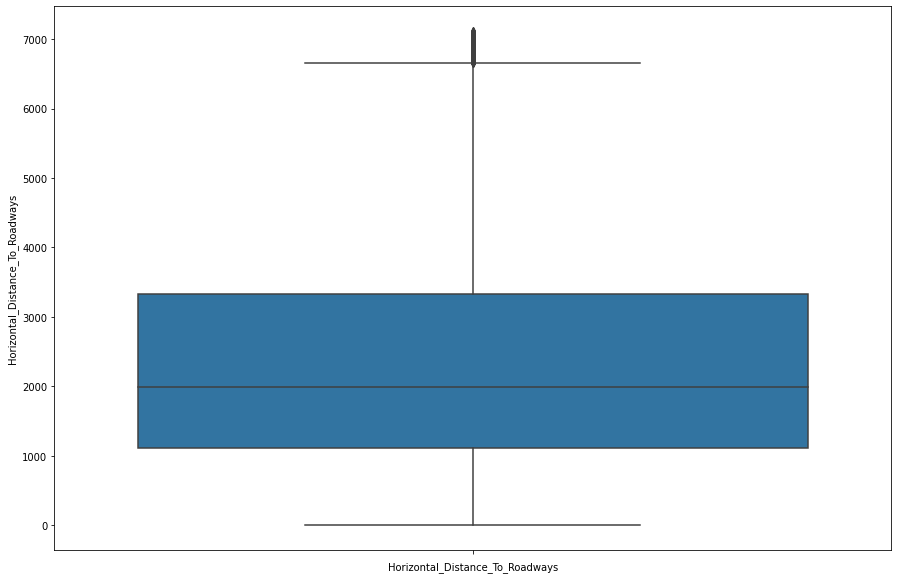

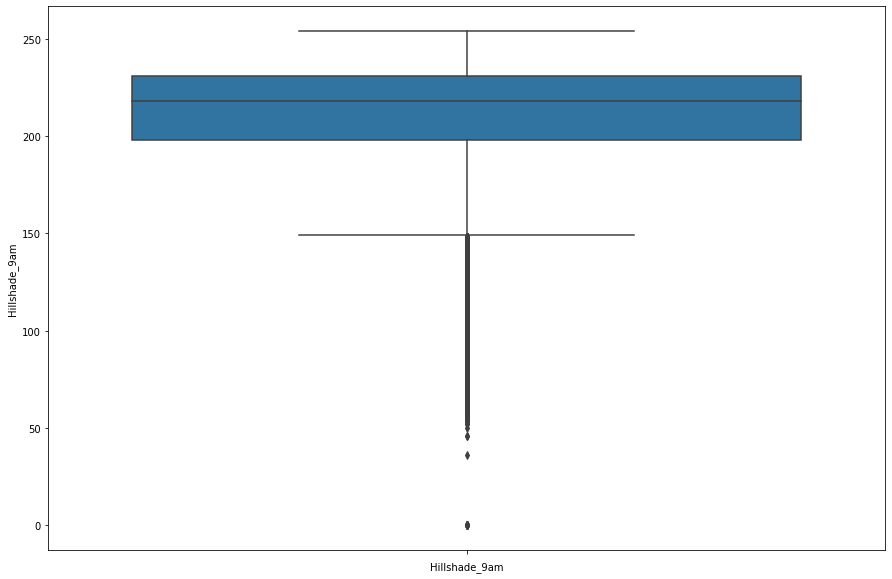

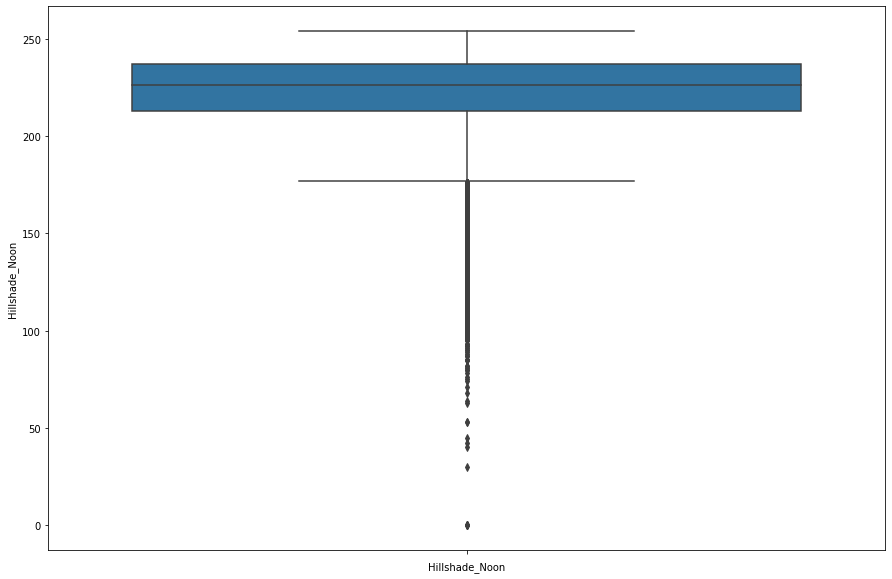

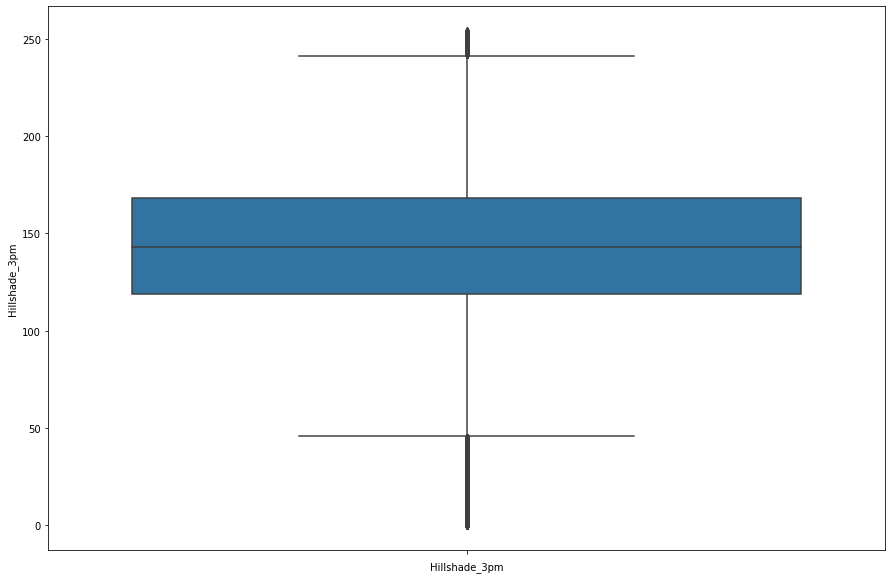

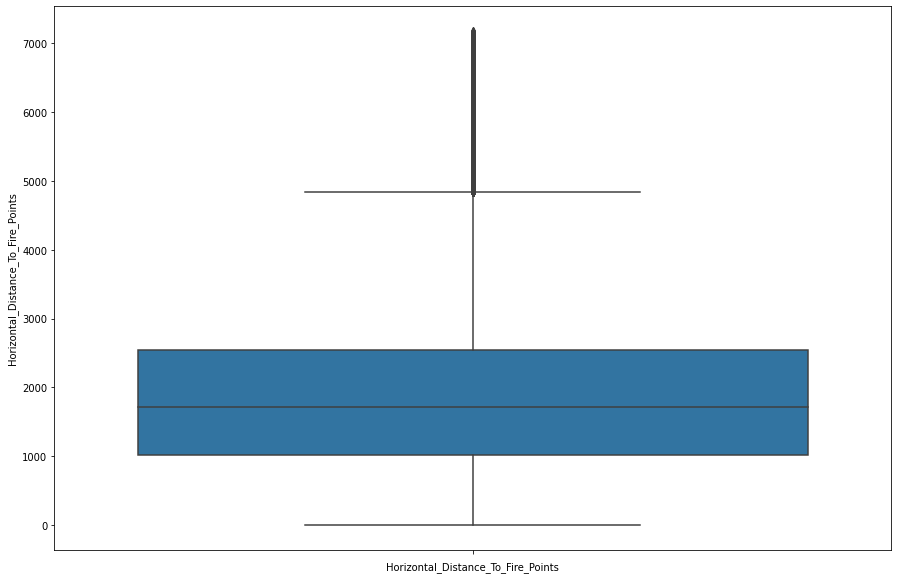

In [18]:
for feature in continuous_features:
    plt.figure(figsize=(15,10))
    sns.boxplot(y=df[feature])
    plt.xlabel(feature)
    plt.show()

We can see there are outliers present in some of the features. Let's see them using IQR.

In [19]:
#Extreme Outliers
for feature in continuous_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_Bound = df[feature].quantile(0.25) - (3 * IQR)
    Upper_Bound = df[feature].quantile(0.75) + (3 * IQR)
    print(feature,'has outliers when',feature,'is less than {} and greater than {}'.format(Lower_Bound,Upper_Bound))

Elevation has outliers when Elevation is less than 1747.0 and greater than 4225.0
Aspect has outliers when Aspect is less than -548.0 and greater than 866.0
Slope has outliers when Slope is less than -18.0 and greater than 45.0
Distance_To_Hydrology has outliers when Distance_To_Hydrology is less than -747.5961320686617 and greater than 1249.8727842000658
Horizontal_Distance_To_Roadways has outliers when Horizontal_Distance_To_Roadways is less than -5560.0 and greater than 9994.0
Hillshade_9am has outliers when Hillshade_9am is less than 99.0 and greater than 330.0
Hillshade_Noon has outliers when Hillshade_Noon is less than 141.0 and greater than 309.0
Hillshade_3pm has outliers when Hillshade_3pm is less than -28.0 and greater than 315.0
Horizontal_Distance_To_Fire_Points has outliers when Horizontal_Distance_To_Fire_Points is less than -3554.0 and greater than 7128.0


### 2.5 Pairplot and Heatmap

In [20]:
#Let's see the relationship among the variables via pairplot.
#sns.pairplot(df)
#plt.show()

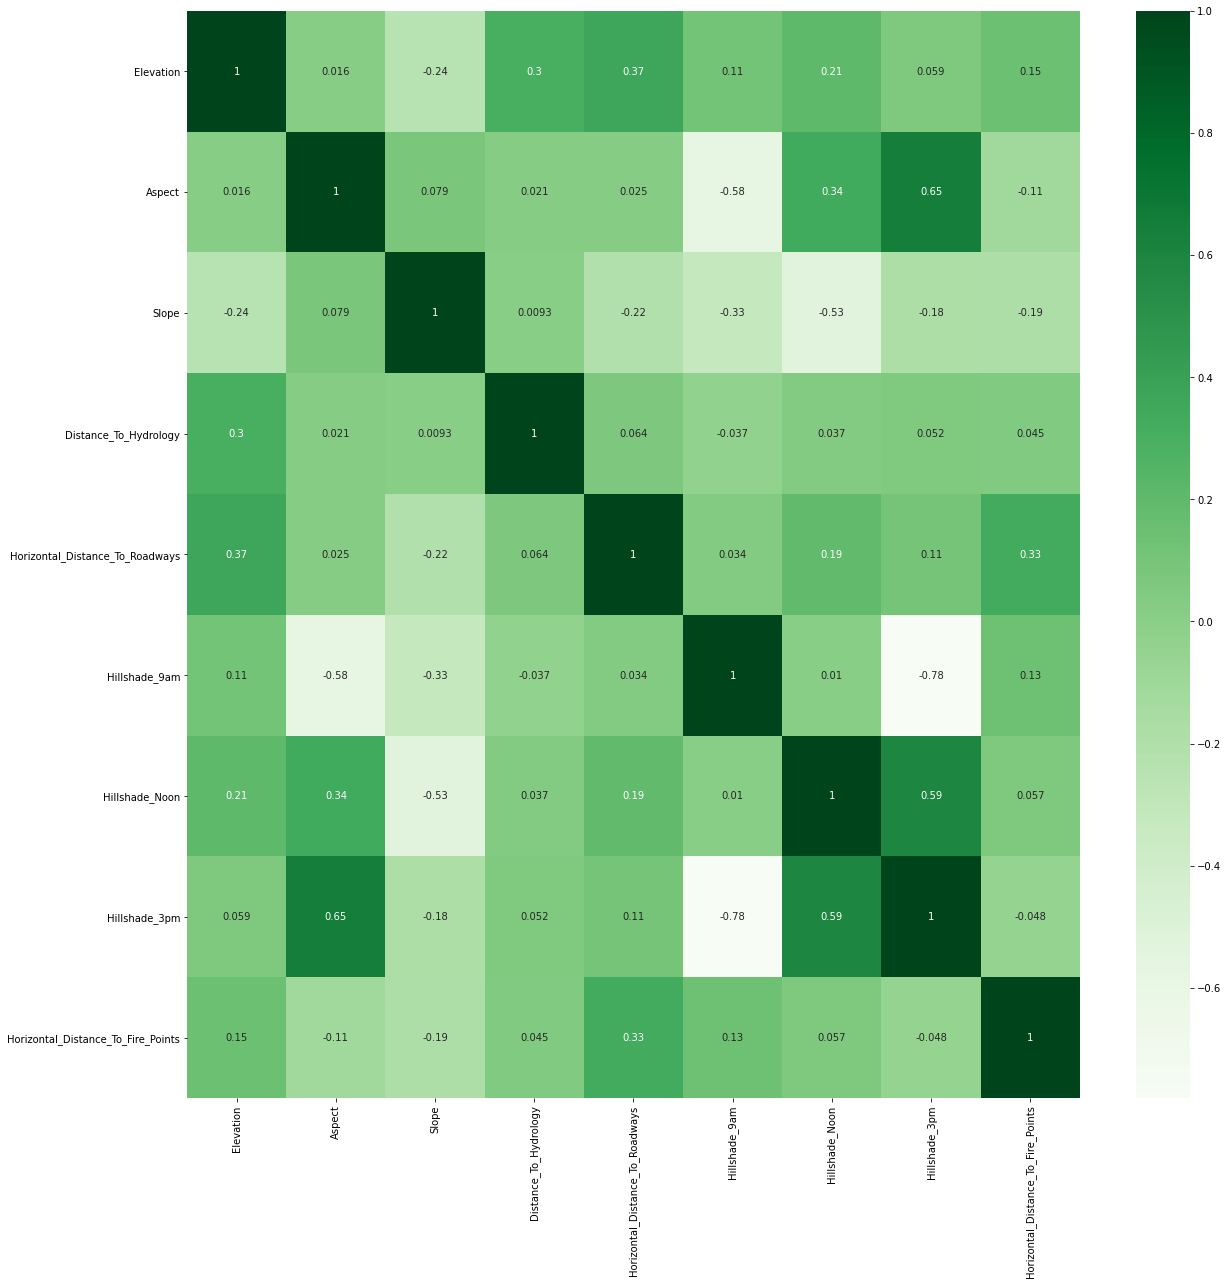

In [21]:
#Let's see the correlation among the features via heatmap.
plt.figure(figsize=(20,20))
corr_matrix = df[continuous_features].corr()
sns.heatmap(corr_matrix,annot=True,cmap='Greens')
plt.show()

In [22]:
#Hillshade_9am and Hillshade_3pm are highly correlated to each other ~ 0.8. We can remove one of them as the other will act as a duplicate if not removed.
df.drop('Hillshade_9am',axis=1,inplace=True)

In [23]:
#We can also drop the Soil Types having very less number of trees.
df.drop(['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15','Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37'],axis=1,inplace=True)

## 3. Feature Engineering

In [24]:
df.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258.000000,510,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212.084889,390,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,275.769832,3180,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,269.235956,3090,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153.003268,391,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Aspen


In [25]:
#Splitting the dataset into training and validation set in order to avoid the overfitting of data.
X = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(406708, 43)
(174304, 43)
(406708,)
(174304,)


In [26]:
X_train.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
508161,2987,332,12,518.231608,1036,224,172,1745,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
296324,2424,279,21,277.584221,1052,237,218,60,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206850,2691,145,22,213.964950,984,230,103,1489,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
324046,2652,50,11,241.513975,272,215,123,342,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261800,3229,207,6,85.052925,4009,246,166,2553,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
X_val.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
215988,2767,66,17,210.770017,1190,204,96,2251,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
424155,2724,160,19,60.133186,1350,240,127,2514,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
274437,2360,65,7,128.724512,1377,226,134,339,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65944,2995,45,4,286.574598,5125,231,146,5706,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11015,2400,106,27,162.692962,342,196,51,811,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
y_train.head()

508161    Lodgepole Pine
296324       Douglas-fir
206850    Lodgepole Pine
324046    Lodgepole Pine
261800         Krummholz
Name: Cover_Type, dtype: object

In [29]:
y_val.head()

215988    Lodgepole Pine
424155    Lodgepole Pine
274437    Panderosa Pine
65944     Lodgepole Pine
11015     Panderosa Pine
Name: Cover_Type, dtype: object

### 3.1 Outlier Handling

In [30]:
#To take care of outliers we'll implement top-coding method and cap the maximum and minimum values to neglect the affect of outliers
#I took this peice of code from this kaggle notebook: https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
def maximum_value(df,feature,max_value):
    return np.where(df[feature]>max_value,max_value,df[feature]) #Wherever the datapoint is greater than max_value replace it with max_value else leave it be

def minimum_value(df,feature,min_value):
    return np.where(df[feature]<min_value,min_value,df[feature])

for dataframe in [X_train,X_val]:
    dataframe['Elevation'] = maximum_value(dataframe,'Elevation',4225.0)
    dataframe['Elevation'] = minimum_value(dataframe,'Elevation',1747.0)
    dataframe['Aspect'] = maximum_value(dataframe,'Aspect',866.0)
    dataframe['Aspect'] = minimum_value(dataframe,'Aspect',-548.0)
    dataframe['Slope'] = maximum_value(dataframe,'Slope',45.0)
    dataframe['Slope'] = minimum_value(dataframe,'Slope',-18.0)
    dataframe['Distance_To_Hydrology'] = maximum_value(dataframe,'Distance_To_Hydrology',1249.873)
    dataframe['Distance_To_Hydrology'] = minimum_value(dataframe,'Distance_To_Hydrology',-747.5961320686617)
    dataframe['Horizontal_Distance_To_Roadways'] = maximum_value(dataframe,'Horizontal_Distance_To_Roadways',9994.0)
    dataframe['Horizontal_Distance_To_Roadways'] = minimum_value(dataframe,'Horizontal_Distance_To_Roadways',-5560.0)
    dataframe['Hillshade_Noon'] = maximum_value(dataframe,'Hillshade_Noon',309.0)
    dataframe['Hillshade_Noon'] = minimum_value(dataframe,'Hillshade_Noon',141.0)
    dataframe['Hillshade_3pm'] = maximum_value(dataframe,'Hillshade_3pm',315.0)
    dataframe['Hillshade_3pm'] = minimum_value(dataframe,'Hillshade_3pm',-28.0)
    dataframe['Horizontal_Distance_To_Fire_Points'] = maximum_value(dataframe,'Horizontal_Distance_To_Fire_Points',7128.0)
    dataframe['Horizontal_Distance_To_Fire_Points'] = minimum_value(dataframe,'Horizontal_Distance_To_Fire_Points',-3554.0)

### 3.2 Feature Scaling

The ensemble techniques such as RandomForest and XgBoost do not require feature scaling, therefore we'll make a copy of X_train and X_val for those 2 ML algorithms if needed.

In [31]:
X_train_ensemble = X_train.copy()
X_val_ensemble = X_val.copy()

In [32]:
from sklearn.preprocessing import RobustScaler
col_names_train = X_train.columns
col_names_val = X_val.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [33]:
X_train = pd.DataFrame(X_train,columns=col_names_train)
X_train.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.025424,1.014851,-0.111111,1.011263,-0.432043,-0.083333,0.591837,0.022936,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.615819,0.752475,0.888889,0.168477,-0.424842,0.458333,1.530612,-1.081258,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.861582,0.089109,1.000000,-0.054328,-0.455446,0.166667,-0.816327,-0.144823,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.971751,-0.381188,-0.222222,0.042153,-0.775878,-0.458333,-0.408163,-0.896461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658192,0.396040,-0.777778,-0.505799,0.905941,0.833333,0.469388,0.552425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_val = pd.DataFrame(X_val,columns=col_names_val)
X_val.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.646893,-0.301980,0.444444,-0.065517,-0.362736,-0.916667,-0.959184,0.354522,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.768362,0.163366,0.666667,-0.593072,-0.290729,0.583333,-0.326531,0.526868,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.796610,-0.306931,-0.666667,-0.352854,-0.278578,0.000000,-0.183673,-0.898427,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.002825,-0.405941,-1.000000,0.199963,1.408191,0.208333,0.061224,2.618611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.683616,-0.103960,1.555556,-0.233891,-0.744374,-1.250000,-1.877551,-0.589122,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Model Building

### 4.1 Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='saga',random_state=0)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_val)

In [36]:
y_pred_log_reg

array(['Lodgepole Pine', 'Lodgepole Pine', 'Panderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Spruce/Fir'], dtype=object)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracies = cross_val_score(log_reg,X_train,y_train,cv=10,scoring='accuracy')
print('Logisitc Regression has a mean training accuracy of:',np.mean(accuracies)*100)

Logisitc Regression has a mean training accuracy of: 72.27790033160053


In [38]:
accuracies = cross_val_score(log_reg,X_val,y_val,cv=10,scoring='accuracy')
print('Logistic Regression has a mean validation accuracy of:',np.mean(accuracies)*100)

Logistic Regression has a mean validation accuracy of: 72.4148599281692


We can optimize the model by tuning the c value which is 1 by default.
We should compare the validation accuracy of our model with the null accuracy i.e accuracy which could be achieved by predicting the most frequent category.

In [39]:
y_val.value_counts()

Lodgepole Pine       85198
Spruce/Fir           63498
Panderosa Pine       10581
Krummholz             6126
Douglas-fir           5229
Aspen                 2850
Cottonwood/Willow      822
Name: Cover_Type, dtype: int64

In [40]:
#We have 85198 records consisting of Lodgepole Pine trees. So the null accuracy can be calculated as follows.
null_acc = 85198/(85198+63498+10581+6126+5229+2850+822)
print('Logistic Regression has a null accuracy of:',null_acc)

Logistic Regression has a null accuracy of: 0.4887897007527079


* We can optimize the model by tuning the C value which is 1 by default.
* Accuracy_score can be deceptive as it doesn't indicate how good the model is at predicting each category correctly. We'll need a confusion matrix for that!

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_log_reg)
print('Confusion Matrix',cm,'\n')

Confusion Matrix [[   15     0    23     0  2717    80    15]
 [    0   342    99     0     2   379     0]
 [    7    20  1225     0  1254  2723     0]
 [    0     0     0  3495    59     0  2572]
 [   55     3   430    43 68056   988 15623]
 [    4   160   729     0  1005  8683     0]
 [    0     0    32  1309 17810    14 44333]] 



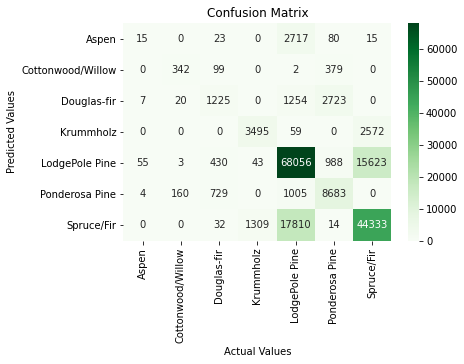

In [42]:
#Let's visualize the confusion matrix using heatmap.
matrix = pd.DataFrame(data=cm,index=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'],
                     columns=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'])
sns.heatmap(matrix,annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [43]:
#Let's get a detailed report using classification_report
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_log_reg))

                   precision    recall  f1-score   support

            Aspen       0.19      0.01      0.01      2850
Cottonwood/Willow       0.65      0.42      0.51       822
      Douglas-fir       0.48      0.23      0.32      5229
        Krummholz       0.72      0.57      0.64      6126
   Lodgepole Pine       0.75      0.80      0.77     85198
   Panderosa Pine       0.67      0.82      0.74     10581
       Spruce/Fir       0.71      0.70      0.70     63498

         accuracy                           0.72    174304
        macro avg       0.60      0.51      0.53    174304
     weighted avg       0.71      0.72      0.71    174304



We can see that our model performs well in predicting the correct classification for LodgePole Pine, Panderosa Pine and Spruce/Fir trees as seen from the recall score. However, Aspen, Cottonwood, Douglas-fir and Krummholz have a lot of misclassification. Let's try out some other ML algorithms and optimize the one which performs the best!

### 4.2 K-Nearest Neighbors (KNN)

First, Let's select the k-value from the error-rate graph.

In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# error_rate = list()

# for i in range(1,40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_val)
#     error_rate.append(np.mean(pred_i!=y_val))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markercolor='red',markersize=10)
# plt.title('Error Rate Vs K-value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

KNN gives good results, however it is extremely slow on this dataset. SVM can also give good results provided you select the appropriate kernel and paramters, however it is also slow in traininhg the model.Hence, I would not advise using them. Let's  try Random Forest

### 4.3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train_ensemble,y_train)
y_pred_rf = rf.predict(X_val_ensemble)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracies = cross_val_score(rf,X_train_ensemble,y_train,cv=5,scoring='accuracy')
print('Random Forest has a mean training accuracy of:',np.mean(accuracies)*100)
accuracies = cross_val_score(rf,X_val,y_val,cv=5,scoring='accuracy')
print('Random Forest has a mean validation accuracy of:',np.mean(accuracies)*100)

Random Forest has a mean training accuracy of: 94.70750531092807
Random Forest has a mean validation accuracy of: 92.41440205041502


As expected, RandomForest performs quite well on the dataset.

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_rf)
print('Confusion Matrix',cm,'\n')

Confusion Matrix [[ 2213     0     7     0   575    26    29]
 [    0   703    20     0     0    99     0]
 [    1    21  4722     0   146   336     3]
 [    0     0     0  5818    36     0   272]
 [  122     0    90    20 82825   173  1968]
 [    7    34   220     0   177 10142     1]
 [   12     0    14   158  3704     3 59607]] 



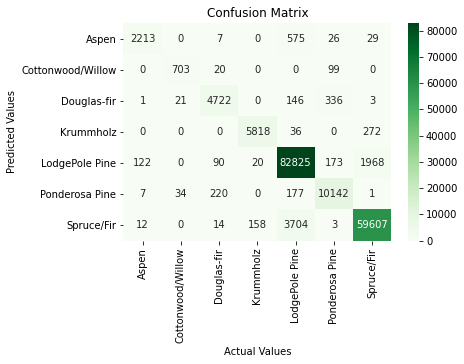

In [47]:
#Let's visualize the confusion matrix using heatmap.
matrix = pd.DataFrame(data=cm,index=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'],
                     columns=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'])
sns.heatmap(matrix,annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [48]:
#Let's get a detailed report using classification_report
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_rf))

                   precision    recall  f1-score   support

            Aspen       0.94      0.78      0.85      2850
Cottonwood/Willow       0.93      0.86      0.89       822
      Douglas-fir       0.93      0.90      0.92      5229
        Krummholz       0.97      0.95      0.96      6126
   Lodgepole Pine       0.95      0.97      0.96     85198
   Panderosa Pine       0.94      0.96      0.95     10581
       Spruce/Fir       0.96      0.94      0.95     63498

         accuracy                           0.95    174304
        macro avg       0.95      0.91      0.93    174304
     weighted avg       0.95      0.95      0.95    174304



RandomForest works well in predicting the correct classification for all the trees as seen by the high f1-scores. Let's optimize this Random Forest Model!

## 5. Hyperparameter Optimization using Optuna

In [49]:
# from sklearn.metrics import accuracy_score
# import optuna

# def objective(trial):
#     params = {
#                'n_estimators': trial.suggest_int('n_estimators',100,1200),
#                'max_features': trial.suggest_categorical('max_features',['auto','sqrt','log2']),
#                'max_depth': trial.suggest_int('max_depth',1,100),
#                'min_samples_split': trial.suggest_int('min_samples_split',2,100),
#                'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,10),
#                'criterion': trial.suggest_categorical('criterion',['entropy','gini']),
#                'bootstrap': trial.suggest_categorical('bootstrap',['True','False'])
#              }
    
#     optimized_model = RandomForestClassifier(**params,n_jobs=-1,verbose=0)
#     optimized_model.fit(X_train_ensemble,y_train)
#     y_pred = optimized_model.predict(X_val_ensemble)
    
#     return accuracy_score(y_val,y_pred)

In [50]:
# study = optuna.create_study()
# study.optimize(objective,n_trials=50,direction='maximize')

In [51]:
# best_params = study.best_params

In [52]:
best_params = {
                'n_estimators': 969,
                'max_features': 'sqrt',
                'max_depth': 40,
                'min_samples_split': 16,
                'min_samples_leaf': 7,
                'criterion': 'gini',
                'bootstrap': 'False'
              }

## 6. Final Model

In [53]:
final_model = RandomForestClassifier(**best_params,random_state=0)
final_model.fit(X_train_ensemble,y_train)
y_pred = final_model.predict(X_val_ensemble)
accuracies = cross_val_score(final_model,X_train_ensemble,y_train,cv=5,scoring='accuracy')
print('Optimized Random Forest has a mean training accuracy of:',np.mean(accuracies)*100)
accuracies = cross_val_score(final_model,X_val_ensemble,y_val,cv=5,scoring='accuracy')
print('Optimized Random Forest has a mean validation accuracy of:',np.mean(accuracies)*100)

Optimized Random Forest has a mean training accuracy of: 91.43267440217866
Optimized Random Forest has a mean validation accuracy of: 88.18156696170446


In [54]:
cm = confusion_matrix(y_val,y_pred)
print('Confusion Matrix',cm,'\n')

Confusion Matrix [[ 1660     0     8     0  1094    37    51]
 [    0   637    17     0     0   168     0]
 [    1    26  4284     0   310   603     5]
 [    0     0     0  5529    46     0   551]
 [   94     2   132    30 81744   285  2911]
 [    2    35   258     0   320  9965     1]
 [   15     0    15   184  6101     3 57180]] 



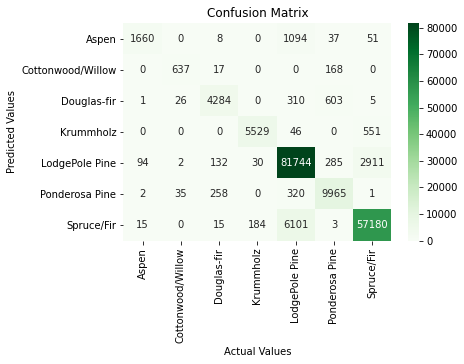

In [55]:
matrix = pd.DataFrame(data=cm,index=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'],
                     columns=['Aspen','Cottonwood/Willow','Douglas-fir','Krummholz','LodgePole Pine','Ponderosa Pine','Spruce/Fir'])
sns.heatmap(matrix,annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [56]:
print(classification_report(y_val,y_pred))

                   precision    recall  f1-score   support

            Aspen       0.94      0.58      0.72      2850
Cottonwood/Willow       0.91      0.77      0.84       822
      Douglas-fir       0.91      0.82      0.86      5229
        Krummholz       0.96      0.90      0.93      6126
   Lodgepole Pine       0.91      0.96      0.94     85198
   Panderosa Pine       0.90      0.94      0.92     10581
       Spruce/Fir       0.94      0.90      0.92     63498

         accuracy                           0.92    174304
        macro avg       0.92      0.84      0.88    174304
     weighted avg       0.92      0.92      0.92    174304



Default Parameters in RandomForest seem to give the best results, therefore we'll use that model!

Let's check the Cohen Kappa Score. **Cohen’s kappa coefficient (κ)** is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. Generally, a score above 0.8 is considered excellent. 

In [61]:
from sklearn.metrics import cohen_kappa_score
cks = cohen_kappa_score(y_val,y_pred_rf)
cks

0.9233541907832179

Let's check the **Matthew's Correlation Coefficient** for Multi-Class classification! This metric represents the correlation between true values and the predicted ones. Similar to Pearson’s correlation coefficient, it ranges from -1 to 1. A score of 1.0 means a perfect classifier, while a value close to 0 means our classifier is no better than random chance. The cool aspect of MCC is that it is perfectly symmetric. Unlike precision and recall, swapping positive and negative classes give the same score. Besides, it only cares if each class is predicted well, regardless of the class imbalance.

In [62]:
from sklearn.metrics import matthews_corrcoef
mc = matthews_corrcoef(y_val,y_pred_rf)
mc

0.9235637846471977

Lastly, we can also check the **log-loss** or **cross-entropy** loss performance metric. One of the most robust single-number metrics is log loss, referred to as cross-entropy loss and logistic error loss. Rather than being a point metric (greater is better), it is an error function (lower is better). So, a classifier that minimizes the log function as much as possible is considered the best one. Another advantage of log loss is that it only works with probability scores or, in other words, algorithms that can generate probability membership scores.

## 7. Pickle File

In [63]:
#Write to disk to use the model any number of times!
import pickle
file = open('forest.pkl','wb')
pickle.dump(rf,file)
file.close()

In [ ]:
loaded_model = pickle.load(open('forest.pkl','rb'))
final_pred = loaded_model.predict(X_val)